# **Business Case :  OLA - Ensemble Learning Business Case**

# **❖ Topic: Ensemble Learning in Driver Attrition Prediction**

# **# Problem Statement :**

1.Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola.

2.Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

3.As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

4.You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like
Demographics (city, age, gender etc.) Tenure information (joining date, Last Date) Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

# **Why this case study?**

From the company’s perspective:

● Ola is a leading ride-sharing platform, aiming to provide reliable, affordable, and convenient urban transportation for everyone.

● The constant challenge Ola faces is the churn rate of its drivers. Ensuring driver.loyalty and reducing attrition are crucial to the company's operation.

● Analyzing driver data can reveal patterns in driver behavior, performance, and
satisfaction. This would help in foreseeing potential churn, allowing proactive
measures.

● By leveraging data science and ensemble learning, Ola can predict driver churn,which would be pivotal in its driver retention strategy.


# **From the learner’s perspective:**

● Engaging with this case offers a practical understanding of how ride-sharing
giants operate and the challenges they face.

● Ensemble learning, comprising various algorithms and techniques, can
significantly improve prediction accuracy over standalone methods.

● This exercise hones the participant's skills in imputation, dealing with class
imbalances, feature engineering, and model evaluation.

● Additionally, learners gain hands-on experience in tackling real-world problems,
transforming raw data into actionable insights that can guide business strategies.


## **Dataset Explanation/Coloums Presence : ola_driver.csv**


1. MMMM-YY: Reporting month and year.
2. Driver_ID: A unique identifier for every driver.
3. Age: Age of the driver.
4. Gender: Driver's gender. Male: 0, Female: 1.
5. City: City code representing the city the driver operates in.
6. Education_Level: Education level of the driver, categorized into 0 for 10+, 1 for
12+, and 2 for graduate.
7. Income: Average monthly income of the driver.
8. Date Of Joining: The date when the driver joined Ola.
9. LastWorkingDate: The most recent or final day the driver worked with Ola.
10.Joining Designation: Designation of the driver at the onset of their journey with
Ola.
11. Grade: A grade assigned to the driver at the reporting time, likely denoting
performance or other metrics.
12.Total Business Value: The total monetary value (business) a driver brings in a
month. Negative values might indicate cancellations, refunds, or other financial
adjustments.
13.Quarterly Rating: Rating assigned to drivers on a quarterly basis. Ratings range
from 1 to 5, with 5 being the best.

# **Expectation:**

1.Analyzing the dataset to predict driver attrition.

2.Our primary goal is to utilize ensemble learning techniques, evaluate the performance of models, and provide actionable insights to reduce driver churn.

In [ ]:
#Importing Required Libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Importing ML modules (KNN, Bagging and Boosting) and evalution metrics:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

Insights:Imported all the required Libraries.

# **Importing OLA Driver Dataset:**

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 15.2MB/s]


In [ ]:
df=pd.read_csv('ola_driver_scaler.csv')
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


Insights: Read the data successfully and the total number of rows 19104 and 14 columns were present in the given Ola driver dataset.

In [ ]:
#Removing the "Unnamed" Column from the given dataset :
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


Insights:Dropped the column "Unnamed: 0" from the given dataset as we don't require the column.

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


Insights: Retrieved first 5 records from the given dataset

In [ ]:
df.tail()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2
19103,12/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,411480,2


Insights: Retrieved last 5 records from the given dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
df.dtypes

,0
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object
Joining Designation,int64


Insight:checked the datatypes for the columns given from the dataset.

In [ ]:
df.shape

(19104, 13)

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
df.size

248352

In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
df.describe(include='all')

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


Insights and Recommendations:

| **Aspect**                | **Insight**                                                                                                                                                     | **Recommendation**                                                                                                         |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| **Data Completeness**      | - **Age** has ~60 missing values. <br> - **Gender** has ~50 missing values. <br> - **LastWorkingDate** has significant missing values (only 1,616 non-null).      | - Impute or handle missing values appropriately, depending on their importance and context.                                |
| **Unique and Frequent Values** | - **MMM-YY** has 24 unique values; most frequent is "01/01/19" (1,022 occurrences). <br> - **City** has 29 unique values; "C20" is the most frequent (1,008).  | - Analyze trends for frequent **MMM-YY** and **City** to identify temporal or location-specific patterns.                  |
| **Statistical Overview**   | - Mean **Age**: ~34.67 years (range: 21–58). <br> - **Income** ranges from 10,747 to 188,418, with a mean of ~65,652. <br> - **Total Business Value** has wide variability, including negatives (-6,000,000). | - Examine outliers, especially in **Income** and **Total Business Value**. <br> - Investigate negative values in **Total Business Value**. |
| **Performance Metrics**    | - **Quarterly Rating** ranges from 1 to 4, with an average of ~2.01. <br> - **Grade** values average ~2.25 (most between 1 and 3).                                | - Compare performance metrics across demographics (e.g., **City**, **Age**, **Gender**) to identify trends.                |
| **Date Columns**           | - **MMM-YY** and **Dateofjoining** are stored as objects and require conversion for time-based analysis.                                                        | - Convert date columns to datetime format. <br> - Create derived features like tenure (using **Dateofjoining** and **LastWorkingDate**). |
| **City-Specific Insights** | - "C20" is the most common **City**, offering potential for focused analysis.                                                                                   | - Conduct city-specific analysis to identify performance and demographic disparities.                                      |
| **Outliers**               | - Significant variability in **Income** and **Total Business Value**, with possible anomalies.                                                                 | - Identify and address outliers through further investigation or transformation (e.g., winsorization, scaling).            |


In [ ]:
#Retreving duplicate values if present
duplicates=df[df.duplicated()]
duplicates

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating


Insights : No dulpicates present in the given dataset.

# **Changing the Necessary columns into categorical:**

In [ ]:
categorical_columns=["Gender","City","Education_Level","Joining Designation","Grade","Quarterly Rating"]
df[categorical_columns]=df[categorical_columns].astype('category')


Insights:Converting the categorical columns into "Category" as a datatype.

# **Changing the Necessary columns into DateTime Format:**

In [ ]:
date_columns=["Dateofjoining","LastWorkingDate","MMM-YY"]
df[date_columns]=df[date_columns].apply(pd.to_datetime)

Insights:Converting the datetime columns into "datetime" datatype

# **Renaming the column "MMM-YY" into Readable Column as  "Reporting Date" :**

In [ ]:
df.rename(columns={'MMM-YY':'Reporting_Date'},inplace=True)
df.columns

Index(['Reporting_Date', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

Insights:Renamed the column 'MMM-YY' into "Reporting_Date"

In [ ]:
df.dtypes

,0
Reporting_Date,datetime64[ns]
Driver_ID,int64
Age,float64
Gender,category
City,category
Education_Level,category
Income,int64
Dateofjoining,datetime64[ns]
LastWorkingDate,datetime64[ns]
Joining Designation,category


In [ ]:
#Creating Target Column as "Churn" based on the Lastworkingdate
df1=df.copy()
df1['Churn'] = df1.groupby('Driver_ID')['LastWorkingDate'].transform('max')
df1['Churn'] = np.where(df1['Churn'].isnull(), 0, 1)
df1.astype({'Churn': 'category'})
df1.head()

,Reporting_Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,1
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,1
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0


Insights and Recommendations on adding "Churn" column into the table :

| **Aspect**                | **Insight**                                                                                                           | **Recommendation**                                                                                                         |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| **Reporting Date**         | Sequential data for reporting dates, suggesting potential time-series analysis.                                        | Perform trend analysis or time-series forecasting for key metrics like **Total Business Value** or **Churn**.             |
| **Churn Column**           | The **Churn** column indicates whether a driver has left (1) or stayed (0), which is crucial for retention analysis.   | Analyze factors driving churn (e.g., **Income**, **Grade**, **Quarterly Rating**).                                         |
| **Total Business Value**   | Contains significant variability, including negative values (**-665480**) and zero values, which might indicate losses or missing contributions. | Investigate negative and zero values to identify errors or patterns in underperformance.                                   |
| **LastWorkingDate**        | Missing data (NaT) for several rows, implying active employees or data gaps.                                           | Use this column to calculate tenure and analyze churn patterns.                                                           |
| **Driver Demographics**    | Drivers span different **Cities** (e.g., C23, C7), **Education Levels** (e.g., 2), and **Ages** (e.g., 28, 31).         | Perform demographic analysis to identify differences in performance and churn across **Cities**, **Age**, or **Education**. |
| **Joining Designation & Grade** | Hierarchical data (e.g., **Grade: 1, 2**) could be linked to **Quarterly Rating** or **Income**.                     | Assess correlation between designation, grade, and performance to refine promotion or hiring practices.                    |
| **Income Insights**        | Consistent **Income** values across multiple records for the same driver.                                              | Ensure income is correctly mapped to drivers and explore its relationship with churn or business value.                    |
| **Data Completeness**      | Some columns (e.g., **LastWorkingDate**) have missing values, while others (e.g., **Total Business Value**) might need cleaning. | Handle missing and anomalous data through imputation, outlier detection, or removal.                                       |


In [ ]:
# Reporting count

df1['Reportings'] = df1.groupby('Driver_ID')['Reporting_Date'].transform('count')
df1.head(10)

,Reporting_Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn,Reportings
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,1,3
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,1,3
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,3
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,2
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,2
5,2019-12-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,1,5
6,2020-01-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,1,5
7,2020-02-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,1,5
8,2020-03-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,350000,1,1,5
9,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1,1,5



| **Category**         | **Insights**                                                                                                                                       | **Recommendations**                                                                                                                                                                                                             |
|-----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Churn Analysis**    | Drivers with negative `Total Business Value` (e.g., ID `1`) tend to churn. Older drivers (e.g., ID `4`, Age 43) show higher retention.             | Implement a targeted retention program for younger drivers. Provide additional support or training for underperforming drivers to improve business value.                                                                        |
| **Performance**       | Negative or zero `Total Business Value` (e.g., ID `1`, ID `4`) is linked to poor performance. Quarterly ratings are consistently low.             | Conduct performance reviews for drivers with consistent low ratings or zero business contributions. Incentivize high performers with bonus programs to boost morale.                                                            |
| **Demographics**      | Older drivers (e.g., ID `4`, Age 43) may offer more stability and better long-term value.                                                        | Consider targeted recruitment of experienced drivers. Provide younger drivers with mentorship programs to reduce churn and improve performance.                                                                                 |
| **Regional Trends**   | Cities (`C13`, `C23`, etc.) show varying driver performance trends.                                                                                | Analyze city-specific data to identify and address location-based challenges (e.g., traffic, demand). Tailor driver support programs based on regional needs.                                                                   |
| **Tenure Insights**   | Short tenures (e.g., ID `1`) indicate possible dissatisfaction or mismatch.                                                                       | Use onboarding surveys and periodic check-ins to ensure job satisfaction early in the tenure. Introduce long-term retention bonuses to encourage tenure longevity.                                                              |
| **Reporting Issues**  | Gaps or inconsistencies in monthly reporting (e.g., zero `Total Business Value`) are visible for some drivers.                                    | Set up automated alerts for prolonged periods of low or zero contributions. Improve the reporting structure to ensure accurate and timely tracking of driver metrics.                                                            |


In [ ]:
df1.nunique()

,0
Reporting_Date,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493
Joining Designation,5


Insights:Identified number of unique counts for each column

In [ ]:
# Value counts for each column and their respective unique counts.
for column in df1.columns:
  print(df1[column].value_counts())
  print("-"*50)

Reporting_Date
2019-01-01    1022
2019-02-01     944
2019-03-01     870
2020-12-01     819
2020-10-01     818
2020-08-01     812
2020-09-01     809
2020-07-01     806
2020-11-01     805
2019-12-01     795
2019-04-01     794
2020-01-01     782
2019-11-01     781
2020-06-01     770
2020-05-01     766
2019-05-01     764
2019-09-01     762
2020-02-01     761
2019-07-01     757
2019-08-01     754
2019-10-01     739
2020-04-01     729
2019-06-01     726
2020-03-01     719
Name: count, dtype: int64
--------------------------------------------------
Driver_ID
2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: count, Length: 2381, dtype: int64
--------------------------------------------------
Age
36.0    1283
33.0    1250
34.0    1234
30.0    1146
32.0    1143
35.0    1138
31.0    1076
29.0    1013
37.0     862
38.0     854
39.0     788
28.0     772
27.0     744
40.0     701
41.0     661
26.0     566
42.0     478
25.0 

Insights:Identified number of unique value counts for each column

In [ ]:
#Finding Missing Values in the columns
df.isnull().sum()

,0
Reporting_Date,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


Insights:Missing values present in the columns "Age","Gender" and "Lastworkingdate"

In [ ]:
df1['Gender'].value_counts()

,count
Gender,
0.0,11074
1.0,7978


Insights:Identified Gender wise value counts.Males 11074 and females are 7978

# **Univariate Analysis:**

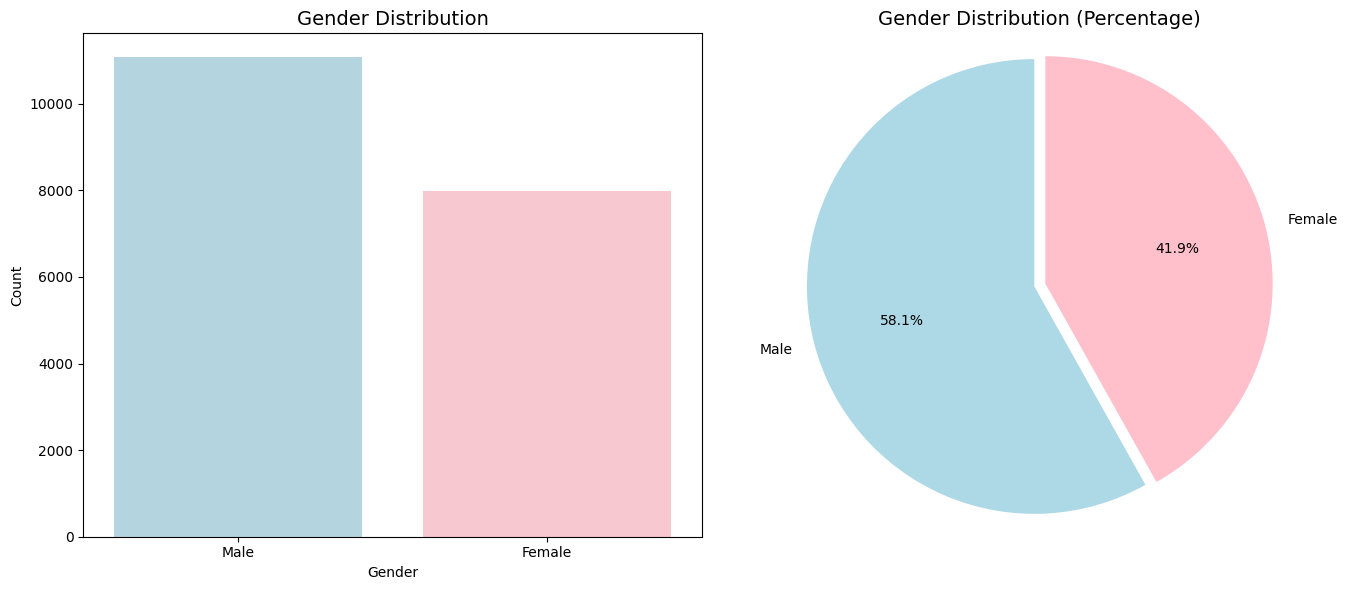

In [ ]:
# Assuming df['Gender'] has values 0 for Male and 1 for Female
# Create a mapping dictionary
gender_map = {0: 'Male', 1: 'Female'}
# Apply the mapping to the 'Gender' column
#Barchart for Gender distribution
df1['Gender_Label'] = df1['Gender'].map(gender_map)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for Gender distribution
sns.countplot(data=df1, x='Gender_Label', ax=axes[0], palette=['lightblue', 'pink'])
axes[0].set_title('Gender Distribution', fontsize=14)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Pie chart for percentage distribution
gender_counts = df1['Gender_Label'].value_counts()
axes[1].pie(gender_counts,
            labels=gender_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=['lightblue', 'pink'],
            explode=[0.05, 0])  # Slightly separate the slices for better visualization
axes[1].set_title('Gender Distribution (Percentage)', fontsize=14)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Insights :

Identified Gender wise percentage distribution of drivers
Male -58% and female-41.9%. and the counts too.




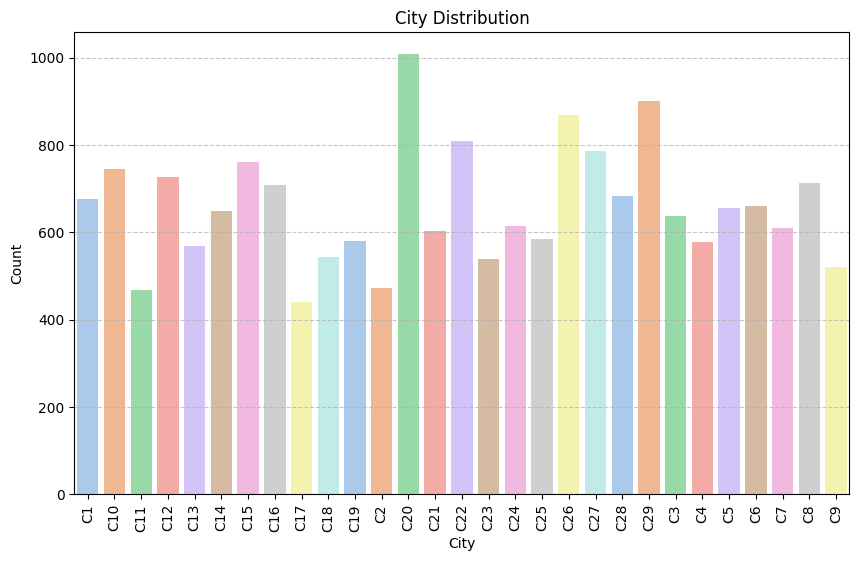

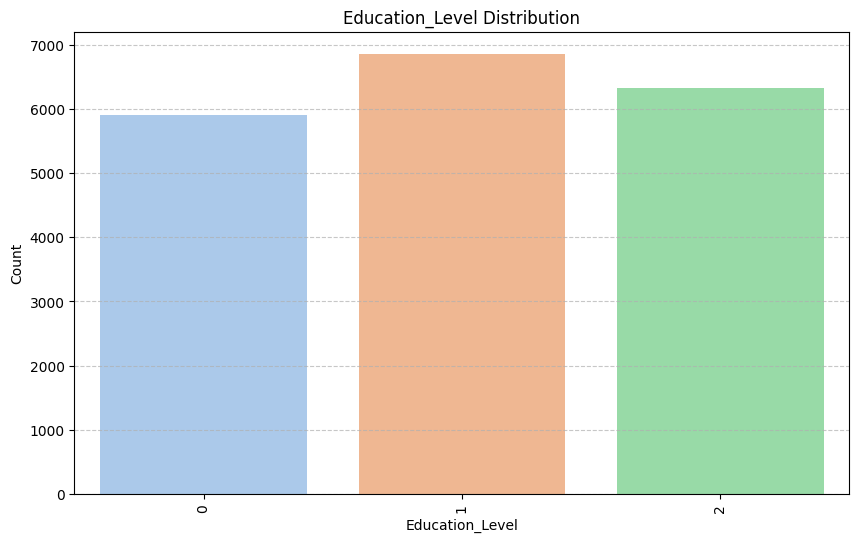

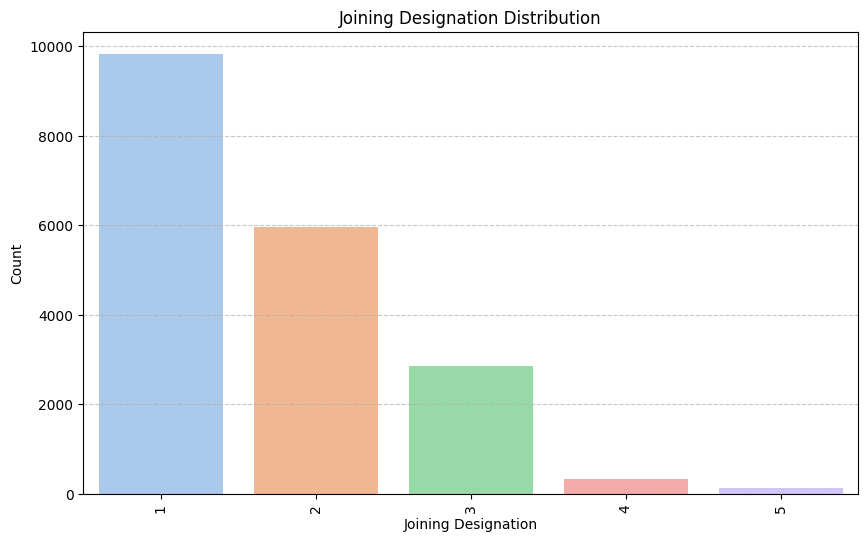

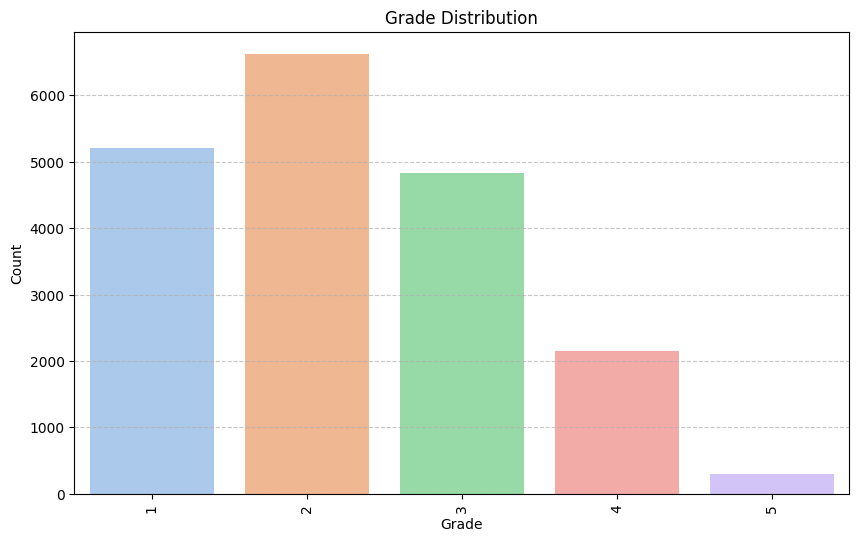

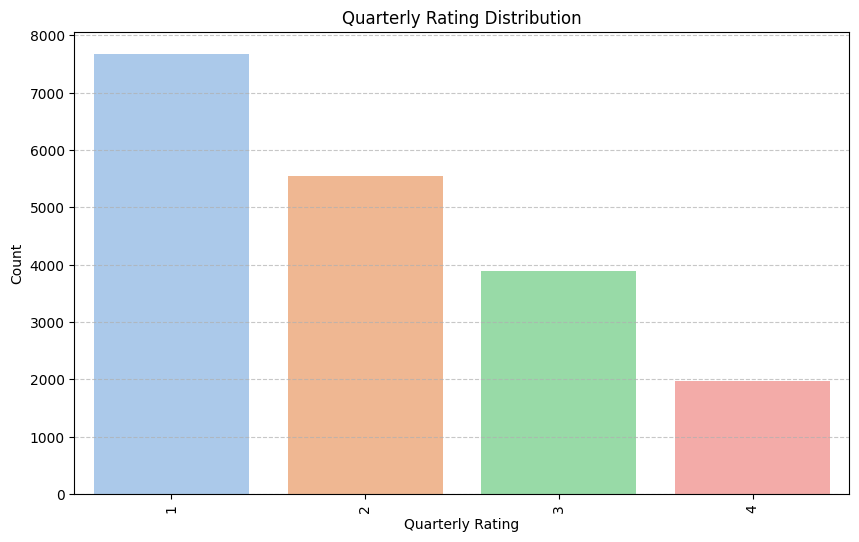

In [ ]:
#Bar plot for all categorical columns:
categorical_columns=['City','Education_Level','Joining Designation','Grade','Quarterly Rating']
for col in categorical_columns:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df1,x=col, palette='pastel')
  plt.title(f'{col} Distribution')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

Insights:

1.	City -“C20” is the top most distribution of drivers compared to other cities.

2.	People with “Education_level =1  are more in the given dataset.

3.	Most of the drivers joined with “Joining Designation” as 1.

4.	Grade -2 is the grade recieved by the drivers based on the reporting time.

5.	Quarterly Rating-1 is the rating received by most of the drivers.


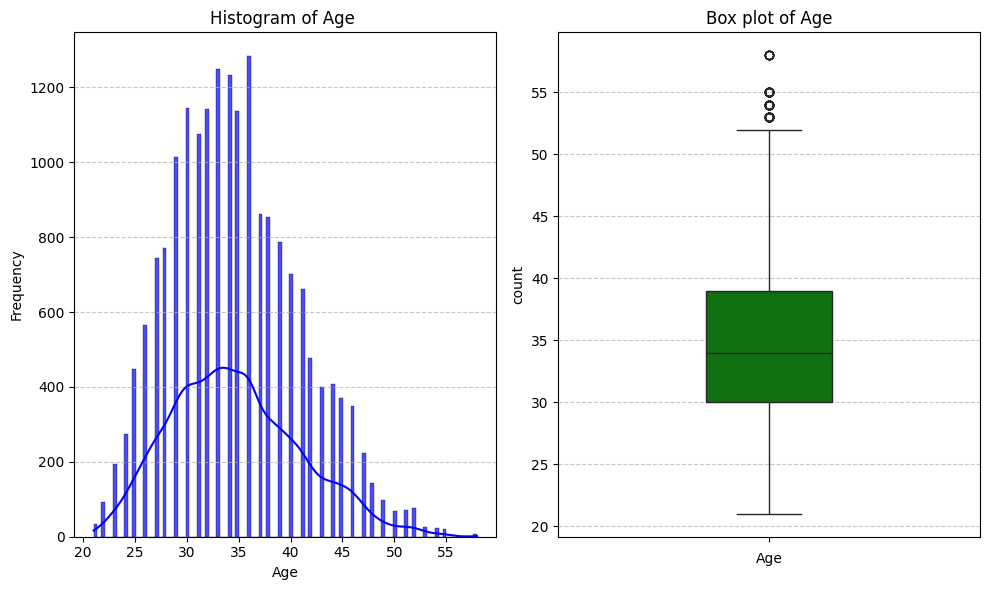

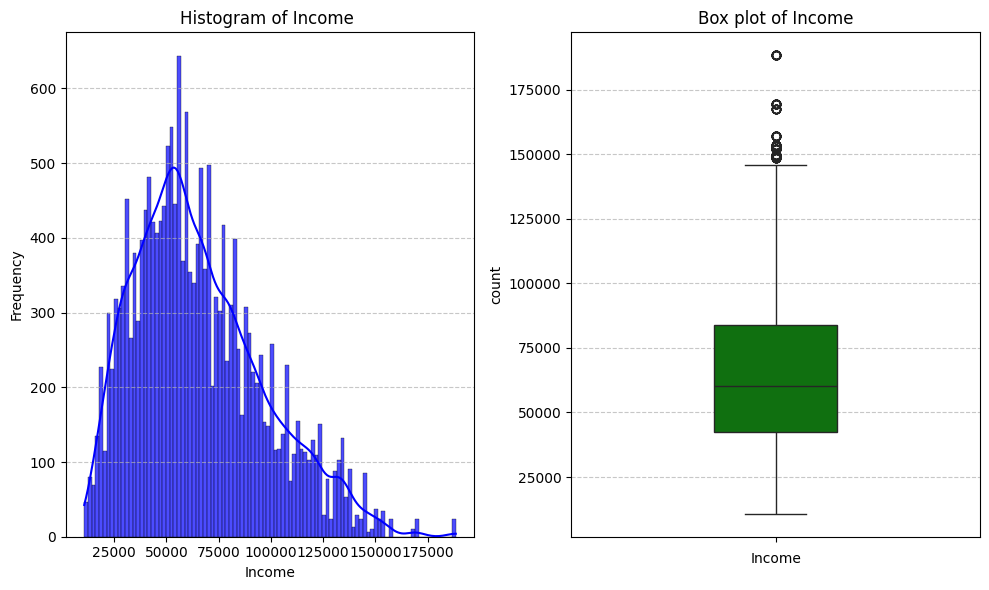

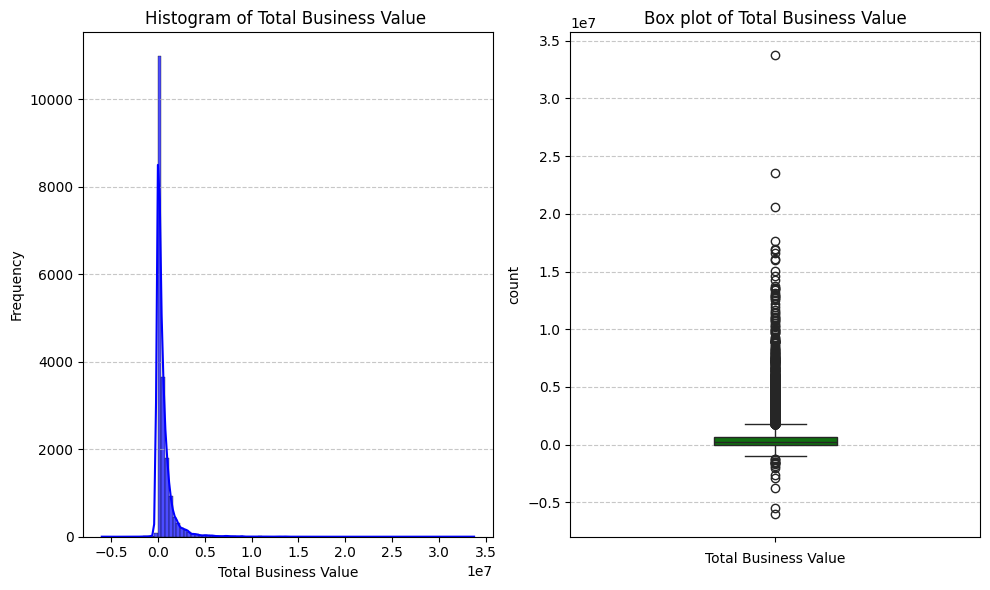

In [ ]:
#plot for numerical columns
numerical_columns=['Age','Income','Total Business Value']
for col in numerical_columns:
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot( df1[col],kde=True,bins=100,color='blue',alpha=0.7)
  plt.title(f'Histogram of {col} ')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(axis='y', linestyle='--', alpha=0.7)


  plt.subplot(1,2,2)
  sns.boxplot(data=df1 ,y=col,color='green' , width=0.3)
  plt.title(f'Box plot of {col}')
  plt.ylabel('count')
  plt.xlabel(col)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()


Insights:

Observed Age,Income and Total Business Value are right skewed data/the distributions are  towards the right.

There are few outliers in the Age,Income and there were lot of outliers in the feature "Total Business Value"

# **Bivariate Analysis:**

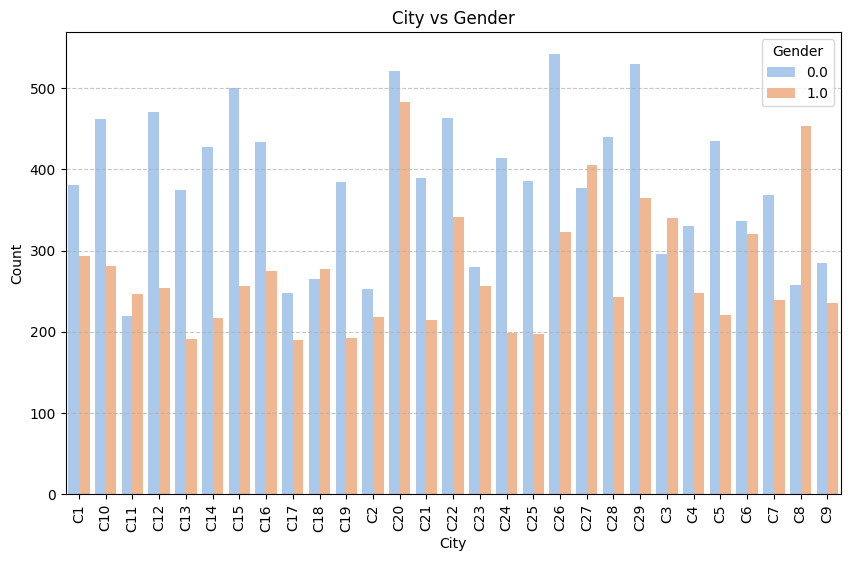

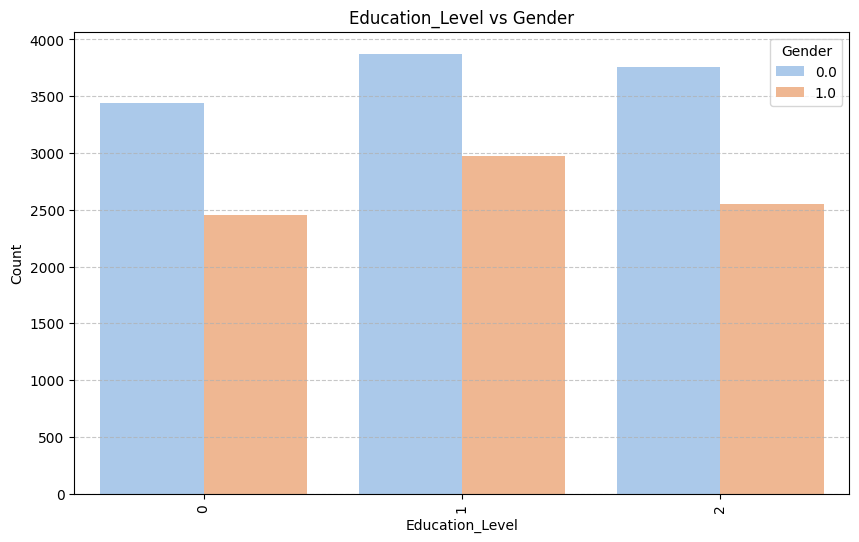

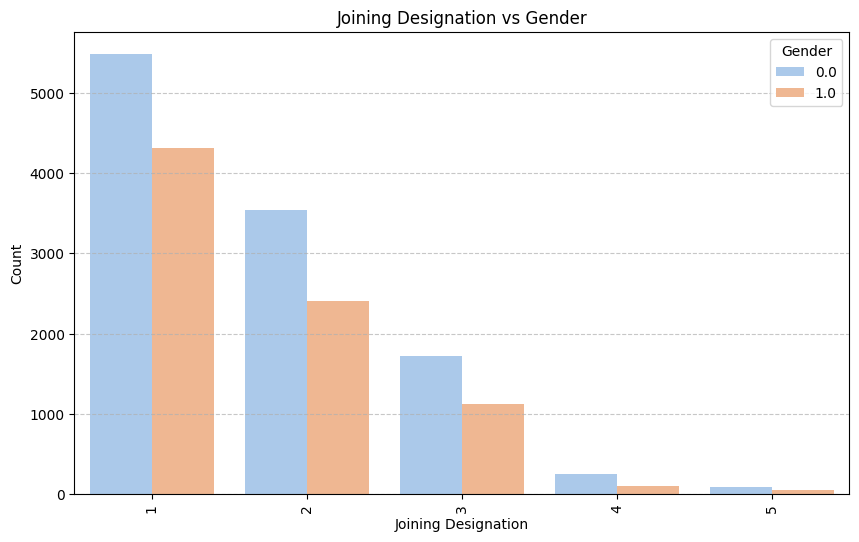

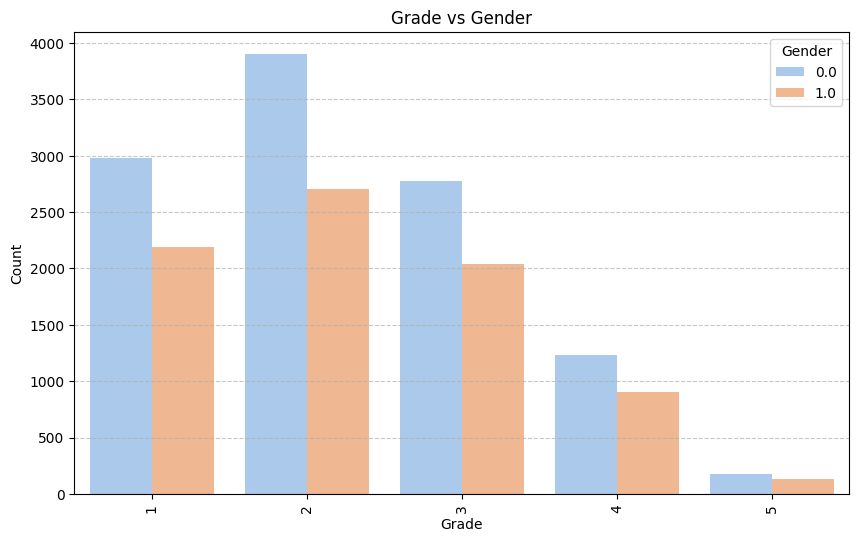

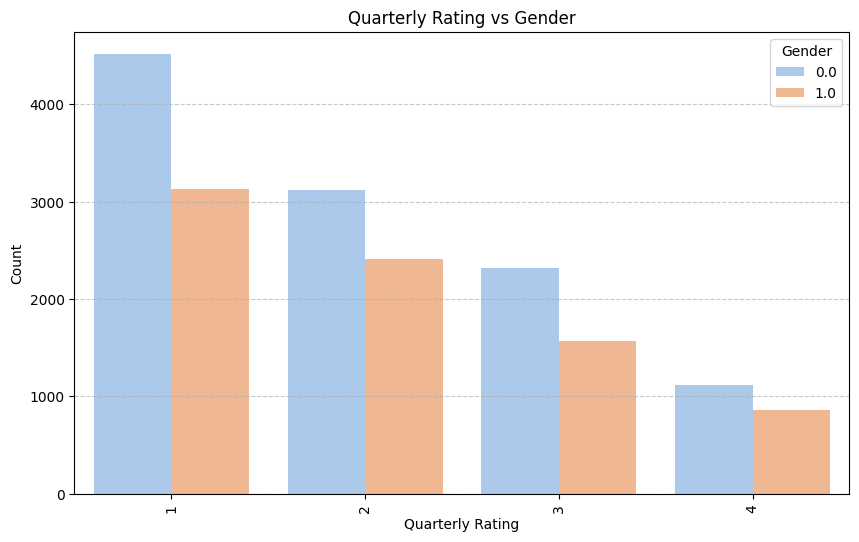

In [ ]:
#categorical vs categorical:
#Categorical columns by gender wise
categorical_columns=['City','Education_Level','Joining Designation','Grade','Quarterly Rating']
for col in categorical_columns:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df1,x=col, hue='Gender', palette='pastel')
  plt.title(f'{col} vs Gender')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()


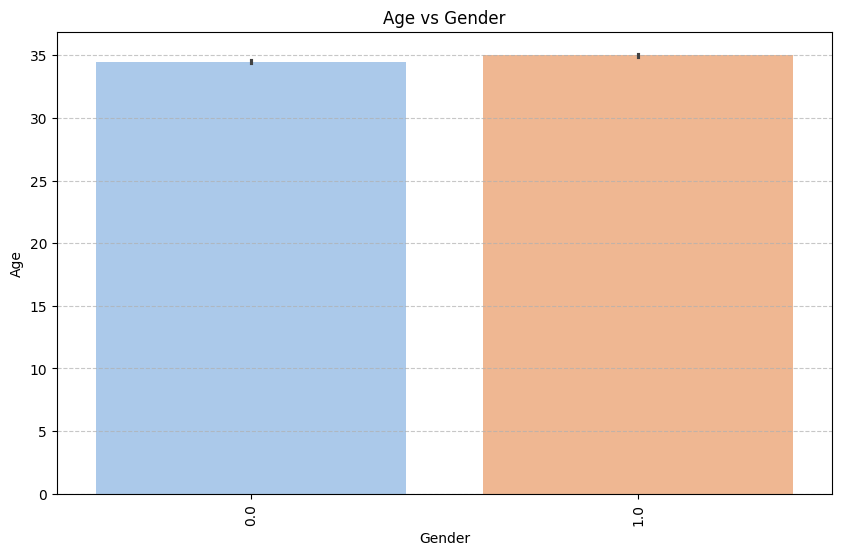

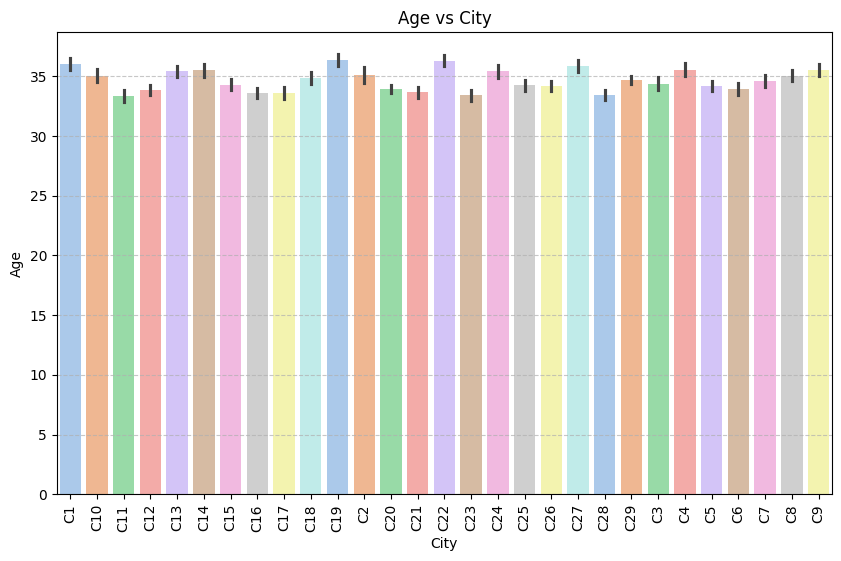

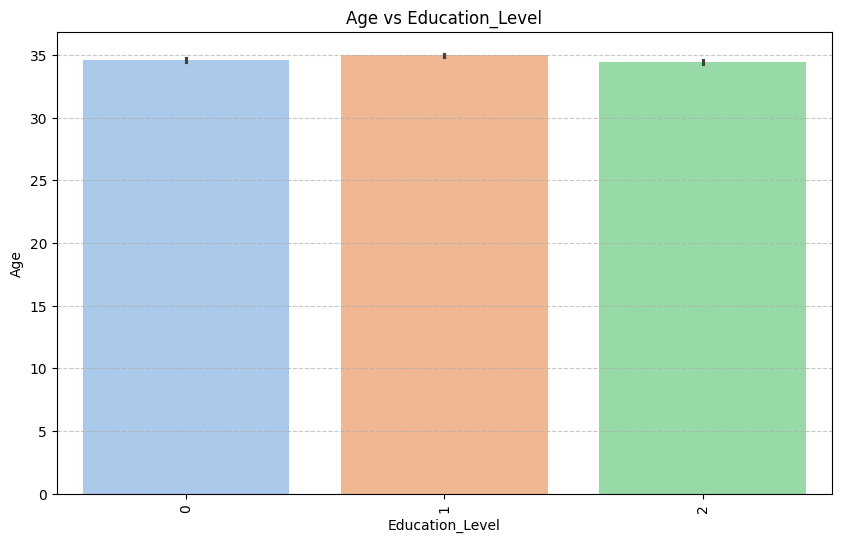

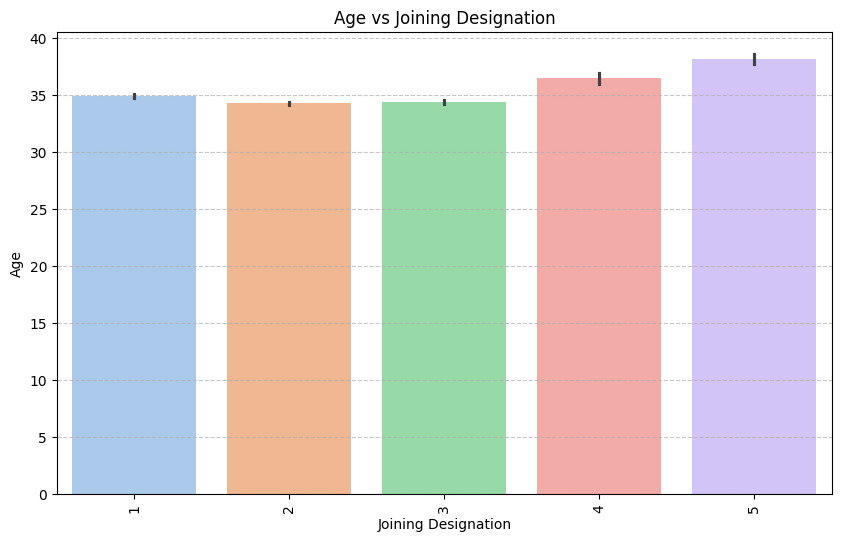

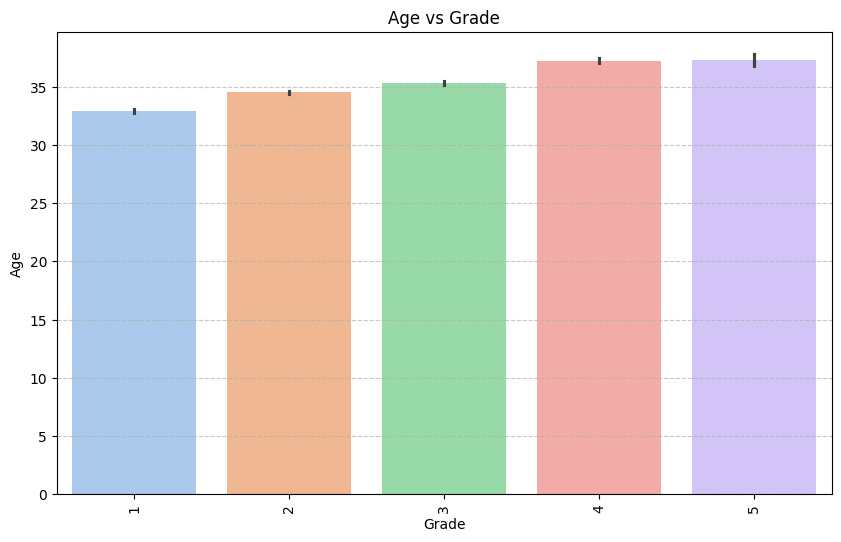

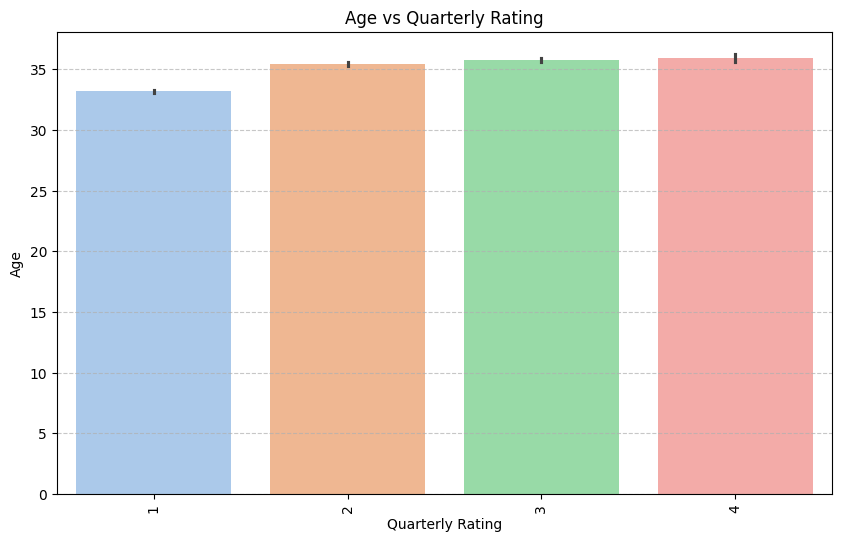

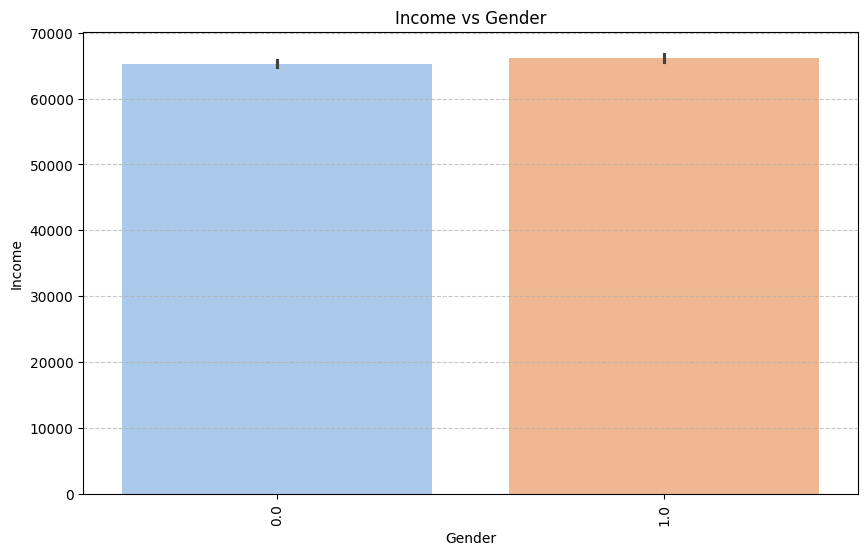

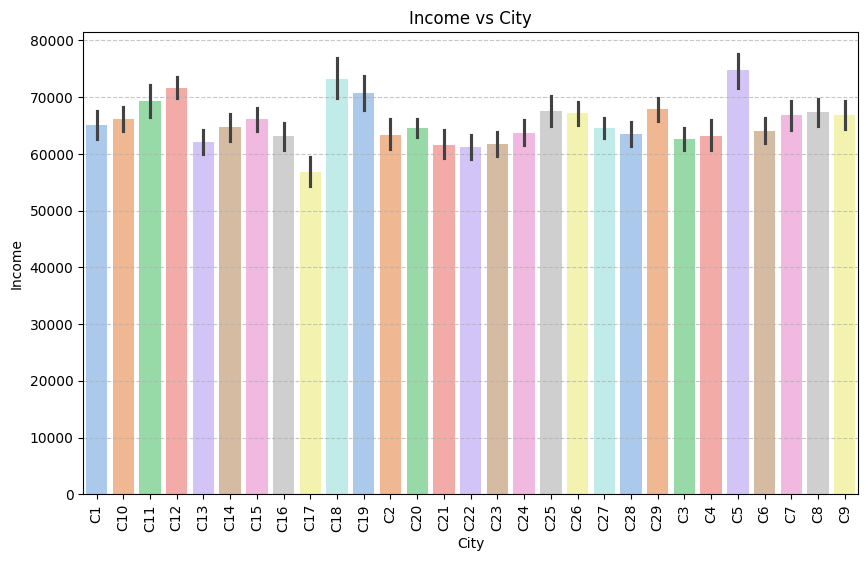

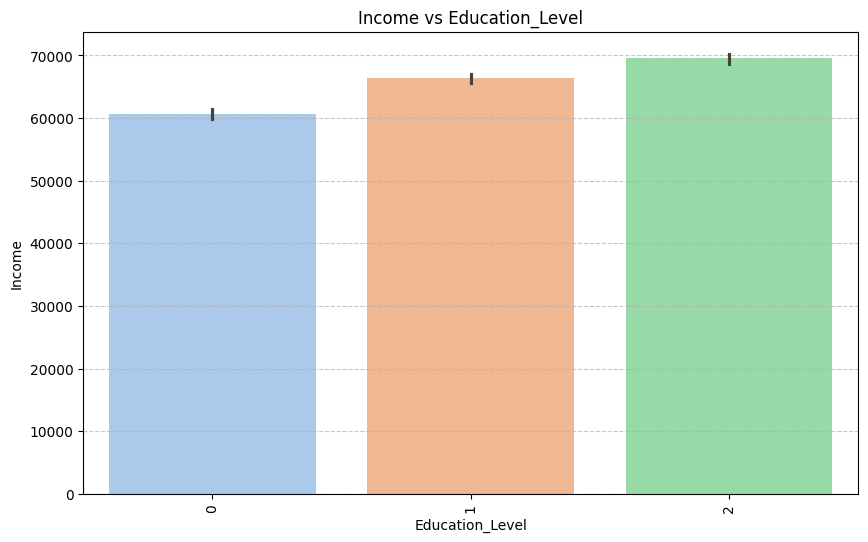

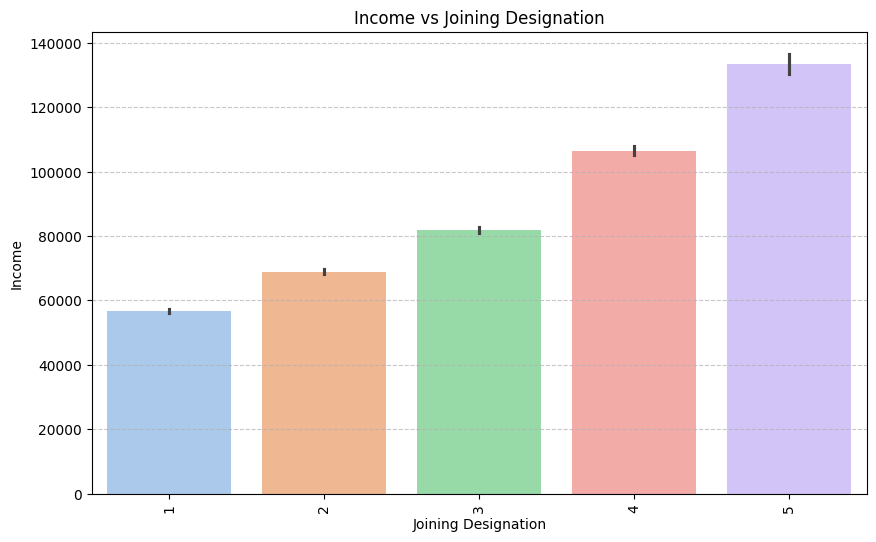

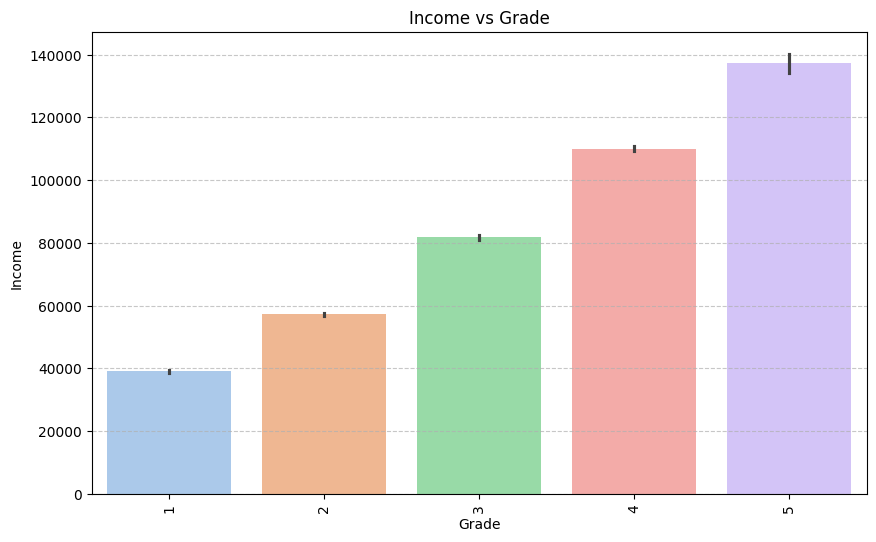

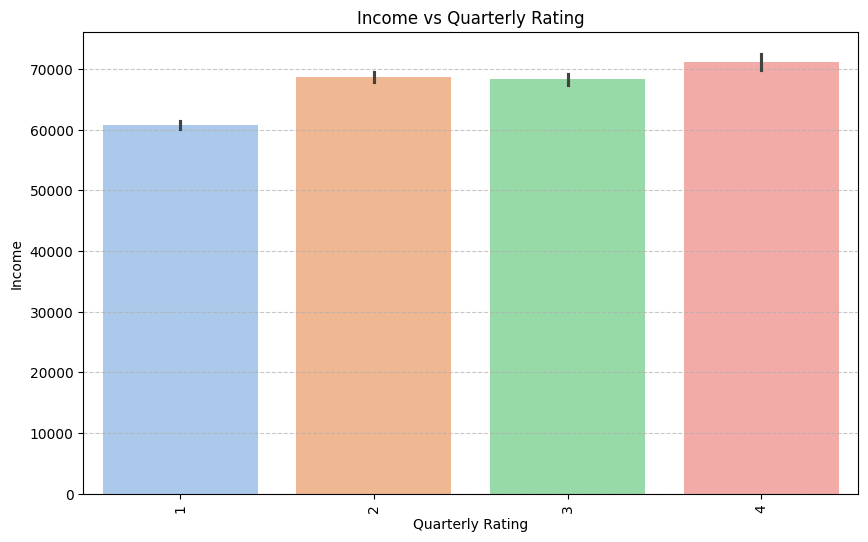

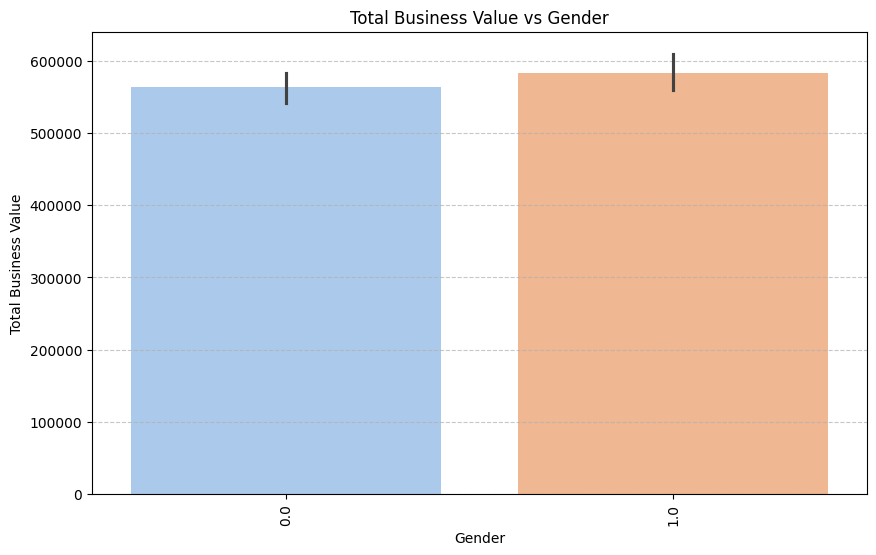

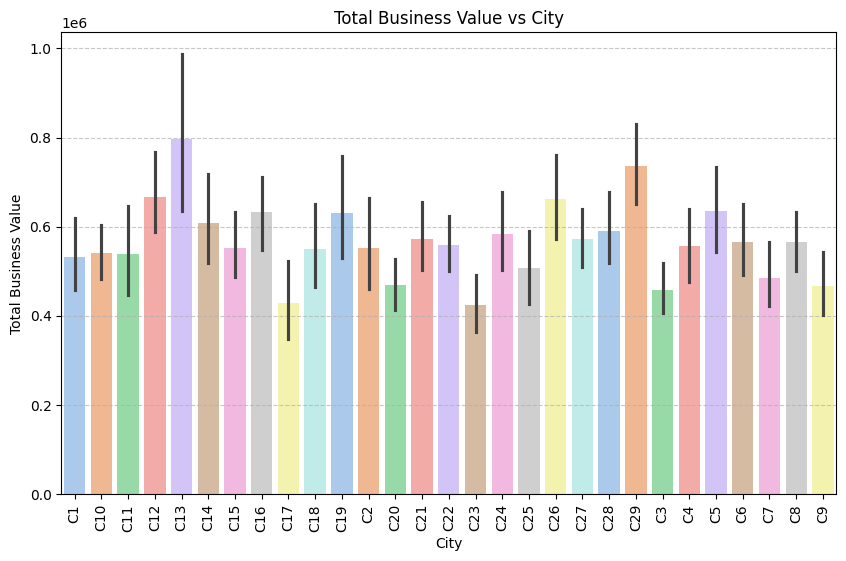

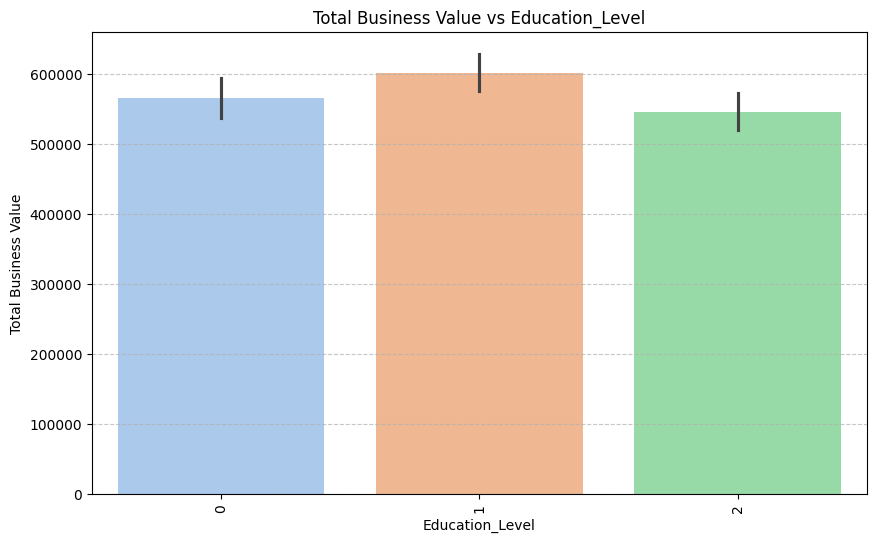

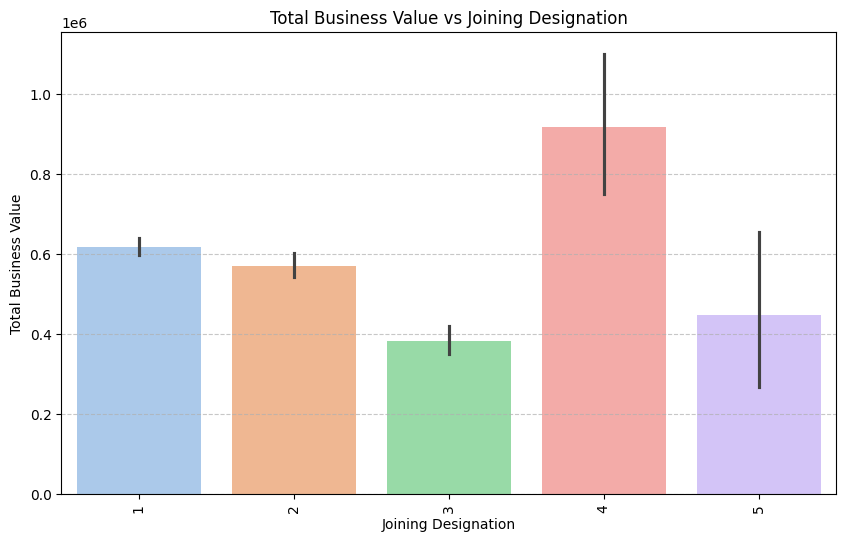

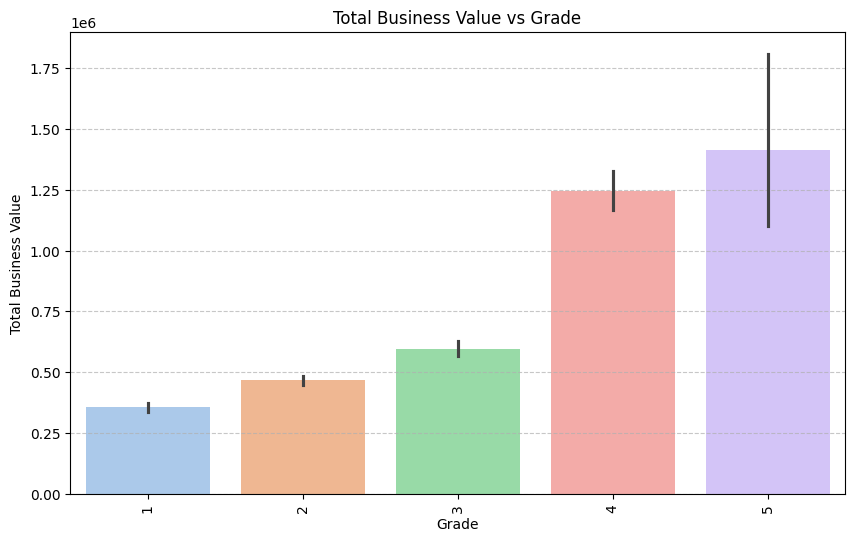

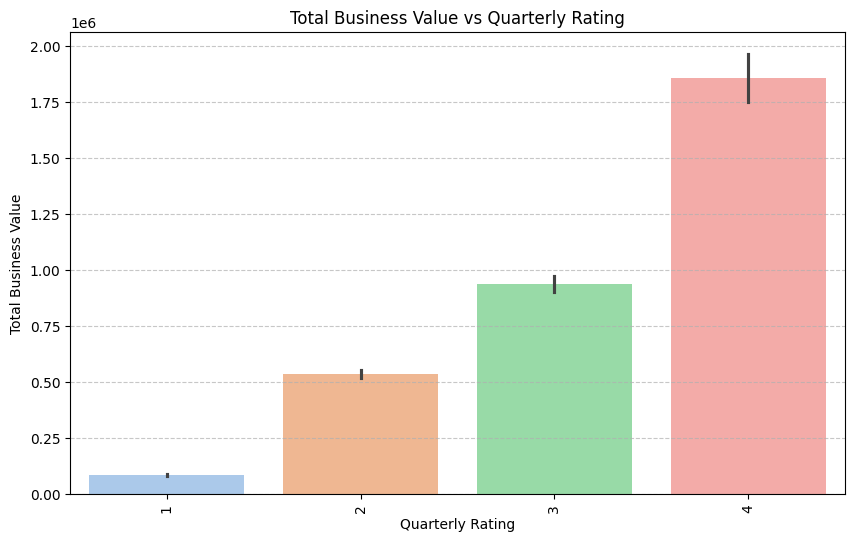

In [ ]:
#Numerical vs categorical :
categorical_columns=['Gender','City','Education_Level','Joining Designation','Grade','Quarterly Rating']
Numerical_columns=['Age','Income','Total Business Value']
for i in Numerical_columns:
  for j in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df1,x=j,y=i,palette='pastel')
    plt.title(f'{i} vs {j}')
    plt.xlabel(j)
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
df1.head()

,Reporting_Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn,Reportings,Gender_Label
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,1,3,Male
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,1,3,Male
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,3,Male
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,2,Male
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,2,Male


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reporting_Date        19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  category      
 4   City                  19104 non-null  category      
 5   Education_Level       19104 non-null  category      
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  category      
 10  Grade                 19104 non-null  category      
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  category      
 13  Churn           

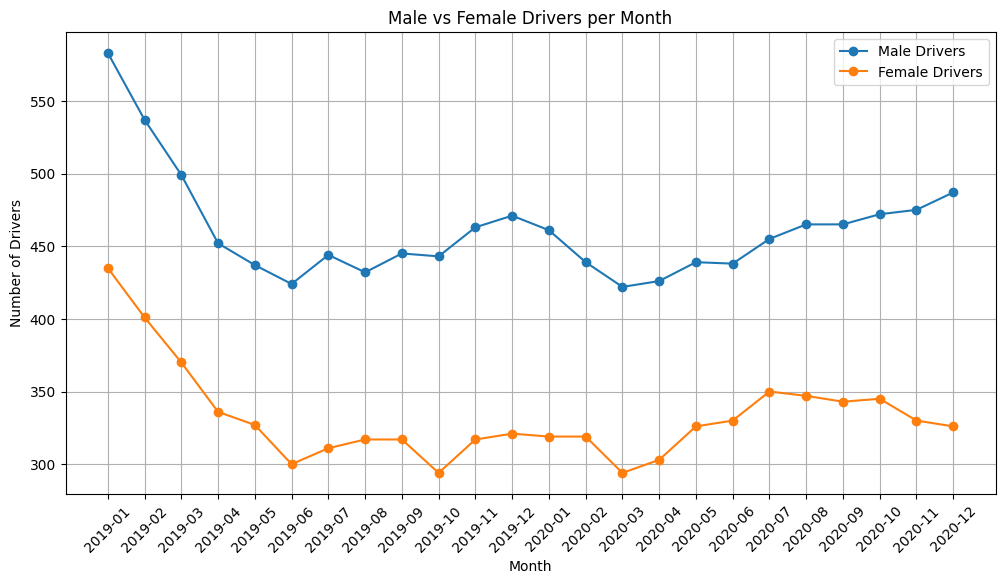

In [ ]:
#Lineplot for male and female drivers per month wise
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and 'Reporting_Date' is in datetime format
df1['Month'] = df1['Reporting_Date'].dt.to_period('M').astype(str)

# Group by 'Month' and 'Gender' to count drivers
driver_counts = df1.groupby(['Month', 'Gender']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(driver_counts.index, driver_counts[0], label='Male Drivers', marker='o')
plt.plot(driver_counts.index, driver_counts[1], label='Female Drivers', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Drivers')
plt.title('Male vs Female Drivers per Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



Insights: Retrieved month wise drivers data based on the gender.

In [ ]:
# Grouping data to calculate the average quarterly rating for each driver
temp_df = df1[['Driver_ID', 'Quarterly Rating']]
temp_df['Quarterly Rating'] = temp_df['Quarterly Rating'].astype('int')
quartetrly_rating_df = temp_df.groupby('Driver_ID').agg({'Quarterly Rating': 'mean'}).reset_index()
quartetrly_rating_df.head()

,Driver_ID,Quarterly Rating
0,1,2.0
1,2,1.0
2,4,1.0
3,5,1.0
4,6,1.6


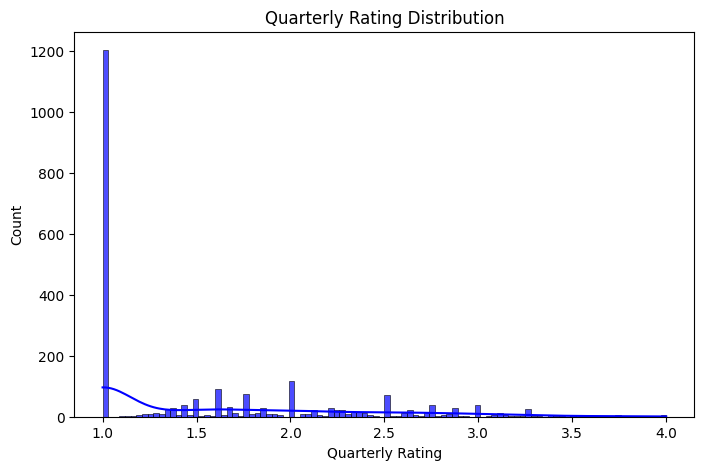

In [ ]:
# hist plot
plt.figure(figsize=(8, 5))
plt.title('Quarterly Rating Distribution')
plt.xlabel('Quarterly Rating')
plt.ylabel('Count')
sns.histplot(quartetrly_rating_df['Quarterly Rating'], kde=True, bins=100, color='blue', alpha=0.7)
plt.show()

Insights :   Observed "Quarterly Rating"  wise distribution and 1 is the highest Quarterly rating reecieved by drivers.

# **Plotting On Continous Variables (Numerical Features): Age,Income and Total Business Value**

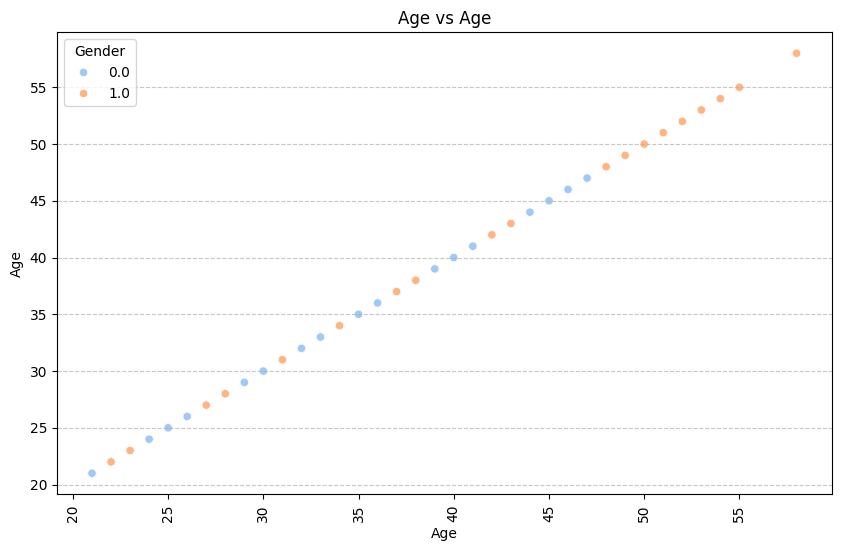

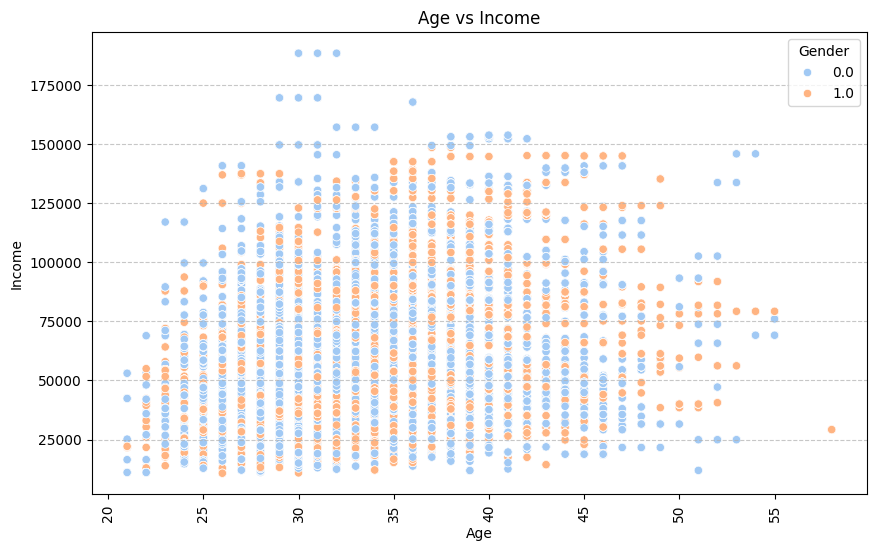

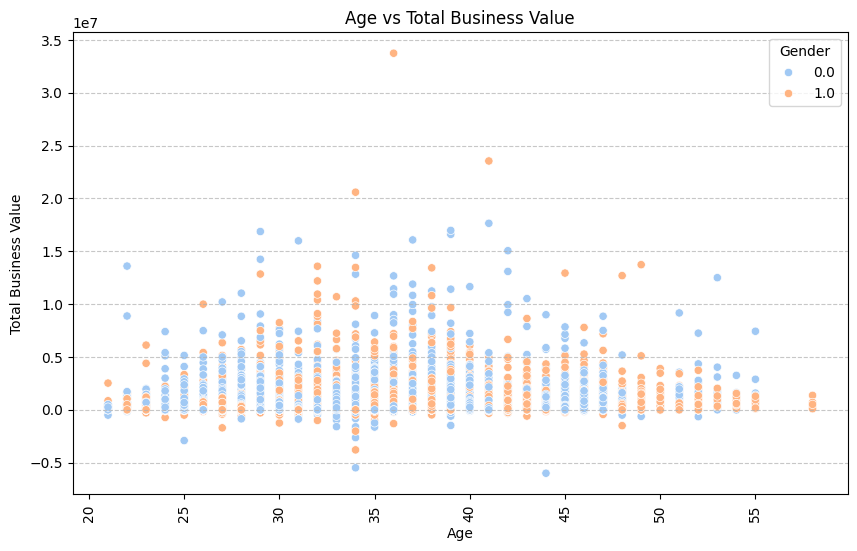

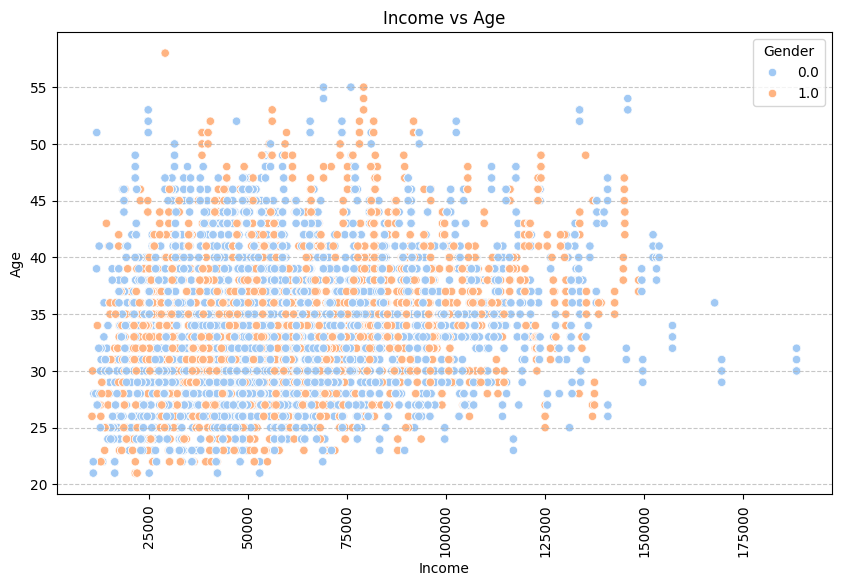

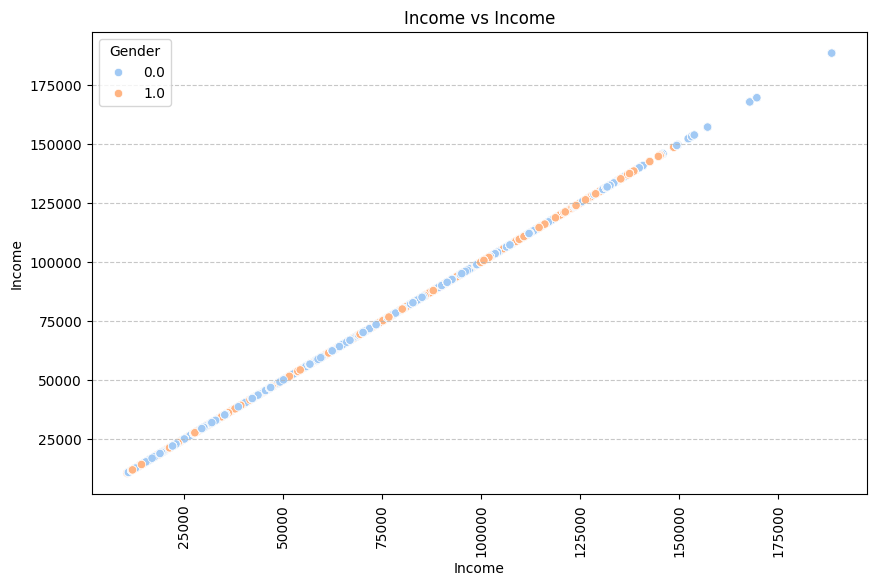

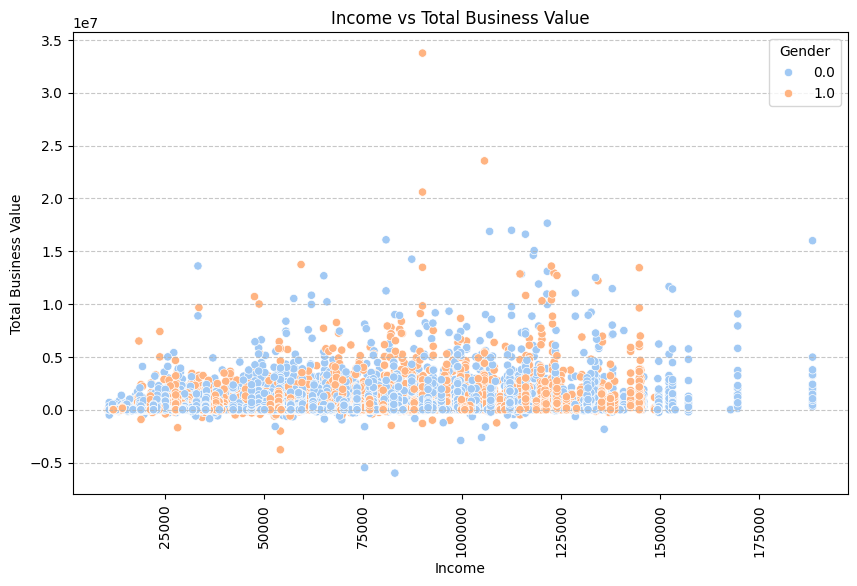

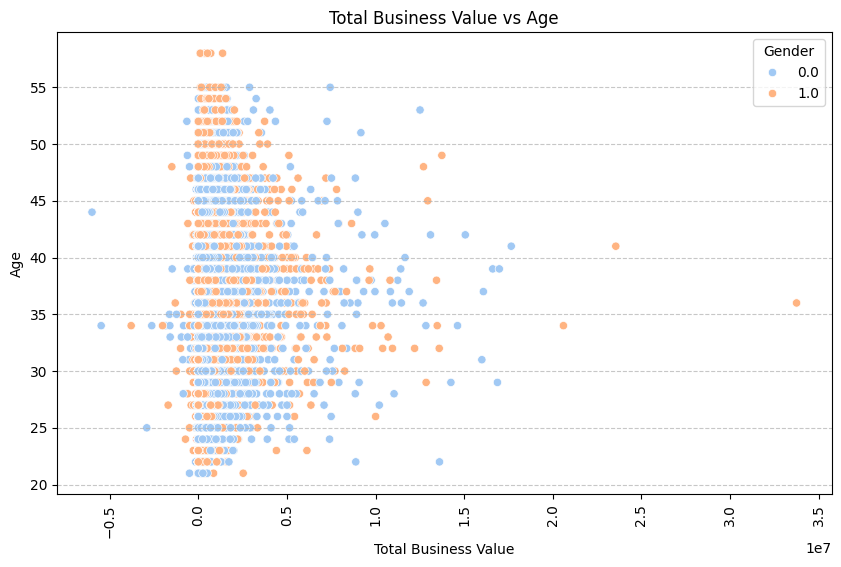

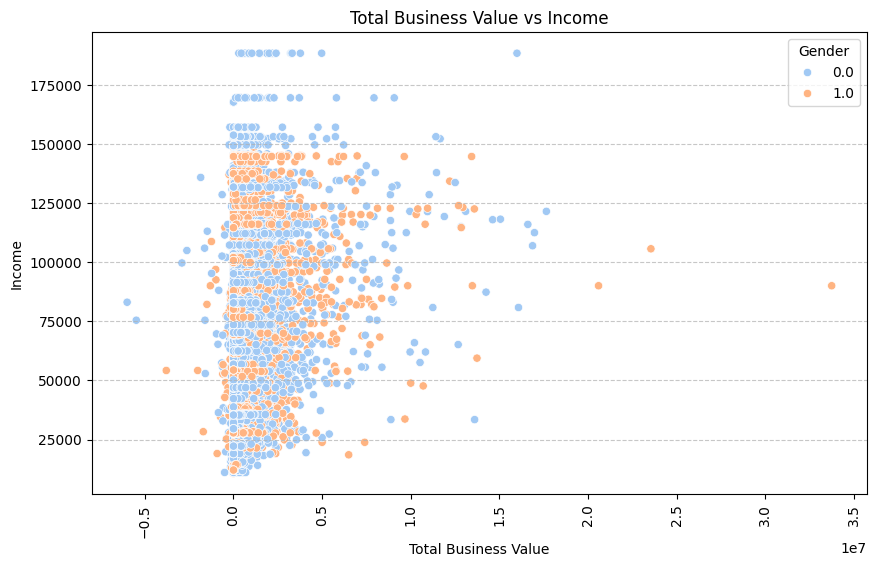

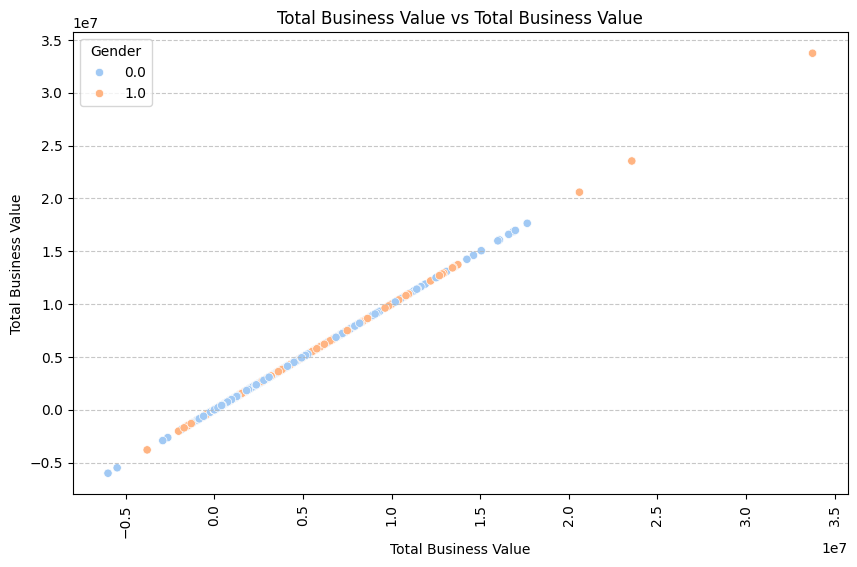

In [ ]:
#Plotting Numerical vs Numerical
numerical_columns=['Age','Income','Total Business Value']
for i in numerical_columns:
  for j in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df1,x=i,y=j,hue='Gender',palette='pastel')
    plt.title(f'{i} vs {j}')
    plt.xlabel(i)
    plt.ylabel(j)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# **MultiVariate Analysis:**

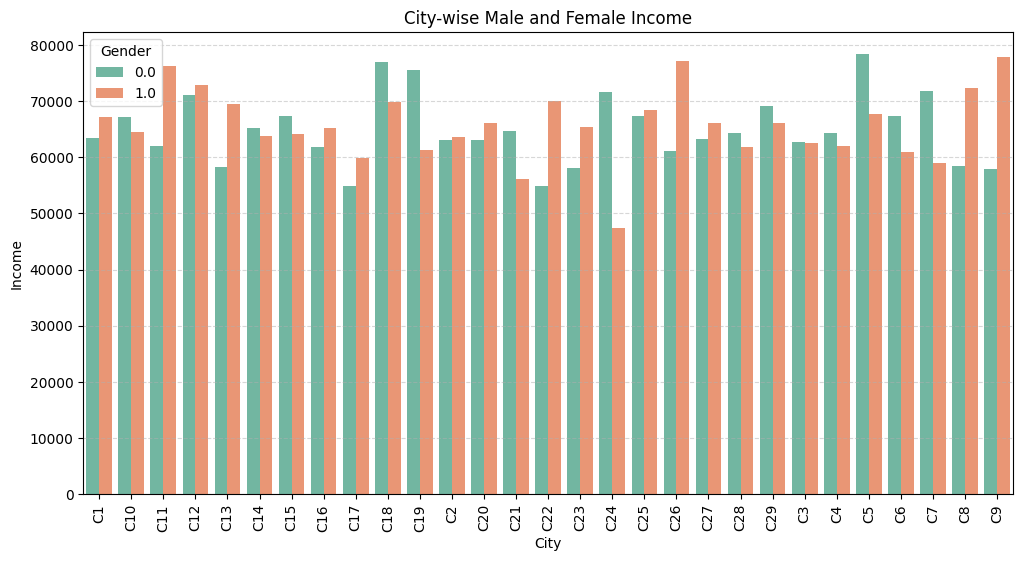

In [ ]:
## City-wise male and female income on the basis of Gender
plt.figure(figsize=(12, 6))
plt.title('City-wise Male and Female Income')
sns.barplot(data=df1, x='City', y='Income', hue='Gender', palette='Set2',ci=None)
plt.xlabel('City')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Insights:Observed that when we compared males income with females income,Females income is more in the cities C1,C11,C12,C13,C16,C20,C22,C23,C26,C27,C8 and C9

# **Monthwise and Year wise Income based on Gender**

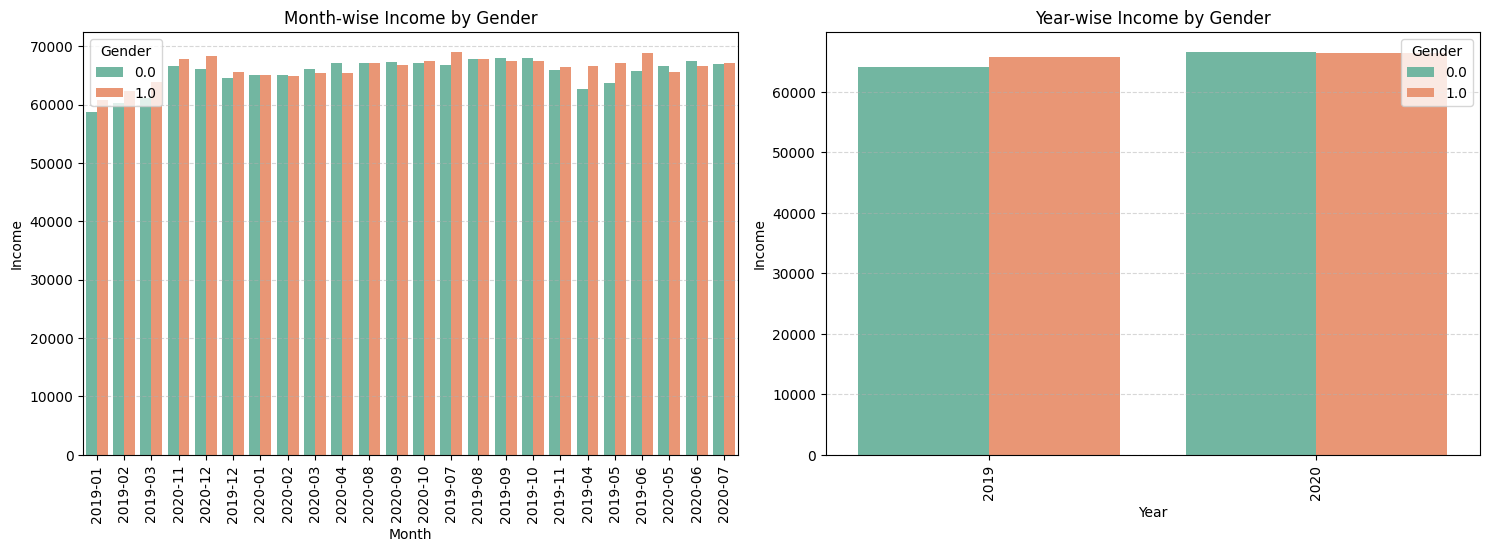

In [ ]:
# Month wise income by gender and yearly income comparision using subplot
# Extract 'Month' and 'Year' from 'Reporting_Date'
#df1['Month'] = df1['Reporting_Date'].dt.strftime('%Y-%m')
df1['Month'] = df1['Reporting_Date'].dt.strftime('%Y-%m')
df1['Year'] = df1['Reporting_Date'].dt.year

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=df1, x='Month', y='Income', hue='Gender', palette='Set2', ci=None)
plt.title('Month-wise Income by Gender')
plt.xlabel('Month')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.subplot(2, 2, 2)
sns.barplot(data=df1, x='Year', y='Income', hue='Gender', palette='Set2', ci=None)
plt.title('Year-wise Income by Gender')
plt.xlabel('Year')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Insights:Observed that in the few of the months and year (2019) too ,females income is more when we compared with males income.

In [ ]:
#Dropping Month and Year from df1 which was created for plotting purpose
df1.drop(['Month','Year'],axis=1,inplace=True)

In [ ]:
df1['City'].value_counts()

,count
City,
C20,1008
C29,900
C26,869
C22,809
C27,786
C15,761
C10,744
C12,727
C8,712


In [ ]:
df1['City'].nunique()

29

In [ ]:
#Statistical Summary
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Reporting_Date,19104,2019-12-11 02:09:29.849246464,2019-01-01 00:00:00,2019-06-01 00:00:00,2019-12-01 00:00:00,2020-07-01 00:00:00,2020-12-01 00:00:00,NaN
Driver_ID,19104.0,1415.591133,1.0,710.0,1417.0,2137.0,2788.0,810.705321
Age,19043.0,34.668435,21.0,30.0,34.0,39.0,58.0,6.257912
Income,19104.0,65652.025126,10747.0,42383.0,60087.0,83969.0,188418.0,30914.515344
Dateofjoining,19104,2018-04-28 20:52:54.874371840,2013-04-01 00:00:00,2016-11-29 12:00:00,2018-09-12 00:00:00,2019-11-05 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653696,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Total Business Value,19104.0,571662.074958,-6000000.0,0.0,250000.0,699700.0,33747720.0,1128312.218461
Churn,19104.0,0.542242,0.0,0.0,1.0,1.0,1.0,0.498225
Reportings,19104.0,13.756386,1.0,6.0,13.0,24.0,24.0,7.970823


# Insights and Recommendations  

| **Column Name**         | **Insights**                                                                                                                                 | **Recommendations**                                                                                                                                         |
|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Reporting_Date**       | The data covers a period from January 1, 2019, to December 1, 2020, with a mean reporting date around December 2019.                        | Ensure regular data updates to keep reporting aligned with current trends.                                                                                  |
| **Driver_ID**            | Unique driver IDs are well-distributed, with a mean of 1415 and a wide range (1 to 2788).                                                    | Maintain unique identifiers and periodically audit for potential duplications.                                        |
| **Age**                  | The average driver age is 34.7 years, with most between 30 and 39 years. The oldest is 58.                                                  | Consider targeting marketing and hiring campaigns for younger professionals while retaining experienced drivers for quality services.                        |
| **Income**               | The average income is $65,652, with a broad distribution. The top 25% earn above $83,969.                                                   | Implement performance-based incentives to help lower-income employees improve their earnings.                                                               |
| **Date of Joining**      | Drivers have a median joining date of September 2018, with the earliest join date in 2013.                                                  | Analyze trends in tenure and implement retention strategies for long-term drivers.                                                                           |
| **Last Working Date**    | Only 1,616 records have valid last working dates, indicating a potential data gap or employee retention challenges.                        | Improve tracking of termination dates and conduct exit interviews to understand churn causes.                                                               |
| **Total Business Value** | High variation in total business value (range: -$6M to $33.7M) with an average of $571,662.                                                  | Investigate negative business values and focus on optimizing performance for maximum revenue generation.                                                     |
| **Churn**                | The churn rate is 54.2%, indicating significant employee turnover.                                                                          | Develop engagement strategies, competitive pay, and reward systems to reduce churn.                                                                          |
| **Reportings**           | The average number of reportings per driver is 13.8, with some drivers having as few as 1 and as many as 24.                                | Standardize reporting frequency to ensure consistent and accurate performance evaluations.                                                                    |

This analysis highlights key trends and actionable recommendations for improving operational efficiency and employee management.


In [ ]:
# Statastical summary of numaricai data

numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
df1[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Churn,19104.0,0.542242,4.982254e-01,0.0,0.0,1.0,1.0,1.0
Reportings,19104.0,13.756386,7.970823e+00,1.0,6.0,13.0,24.0,24.0


In [ ]:
#Dropping "Gender_Label" column which was created for our plotting purpose
df1.drop('Gender_Label',axis=1,inplace=True)

In [ ]:
# Statastical summary of categorical columns

categorical_columns = ['Gender','City','Education_Level','Joining Designation','Grade','Quarterly Rating']
df1[categorical_columns].describe().T

,count,unique,top,freq
Gender,19052.0,2.0,0.0,11074.0
City,19104,29,C20,1008
Education_Level,19104,3,1,6864
Joining Designation,19104,5,1,9831
Grade,19104,5,2,6627
Quarterly Rating,19104,4,1,7679


In [ ]:
# Date time variables stattastical analysis

date_columns = df1.select_dtypes(include=['datetime64']).columns
df1[date_columns].describe().T

,count,mean,min,25%,50%,75%,max
Reporting_Date,19104,2019-12-11 02:09:29.849246464,2019-01-01 00:00:00,2019-06-01 00:00:00,2019-12-01 00:00:00,2020-07-01 00:00:00,2020-12-01 00:00:00
Dateofjoining,19104,2018-04-28 20:52:54.874371840,2013-04-01 00:00:00,2016-11-29 12:00:00,2018-09-12 00:00:00,2019-11-05 00:00:00,2020-12-28 00:00:00
LastWorkingDate,1616,2019-12-21 20:59:06.534653696,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00


# **Updation Of Missing Values:**

In [ ]:
#Finding Missing Values
df1.isnull().sum()*100/len(df1)

,0
Reporting_Date,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


# **3 columns contains missing values:**

LastWorkingDate: Missing values likely mean the employee is still working. we can keep this as it is.

Age: Impute missing values with mean/median or use predictive modeling based on other features.

Gender: Impute with mode (most frequent value) or create an "Unknown" category for missing entries.

In [ ]:
# KNN Imputer

from sklearn.impute import KNNImputer
cols = ['Age', 'Gender']
imputer = KNNImputer(n_neighbors=5)
df1[cols] = imputer.fit_transform(df1[cols])
df1.isnull().sum()

,0
Reporting_Date,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [ ]:
# outliers detection

numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

for i in numerical_columns:
    lower_bound = df1[i].quantile(0.25)
    upper_bound = df1[i].quantile(0.75)
    iqr = upper_bound - lower_bound
    lower_limit = lower_bound - (1.5 * iqr)
    upper_limit = upper_bound + (1.5 * iqr)
    outliers = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)]
    print(f"Number of outliers in {i}: {len(outliers)}")
    print("-" * 50)


Number of outliers in Driver_ID: 0
--------------------------------------------------
Number of outliers in Age: 78
--------------------------------------------------
Number of outliers in Gender: 0
--------------------------------------------------
Number of outliers in Income: 188
--------------------------------------------------
Number of outliers in Total Business Value: 1371
--------------------------------------------------
Number of outliers in Churn: 0
--------------------------------------------------
Number of outliers in Reportings: 0
--------------------------------------------------


Insights:Outliers present in the features Age,Income and Total Business Value

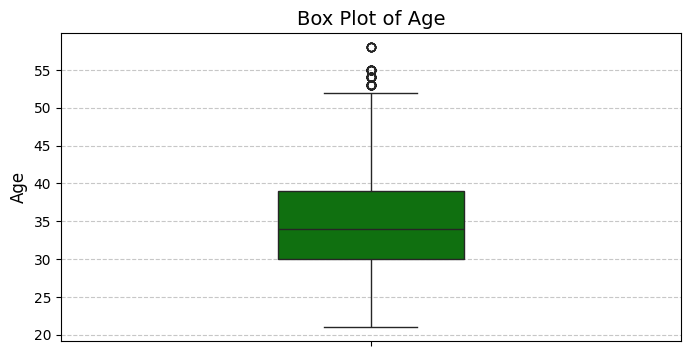

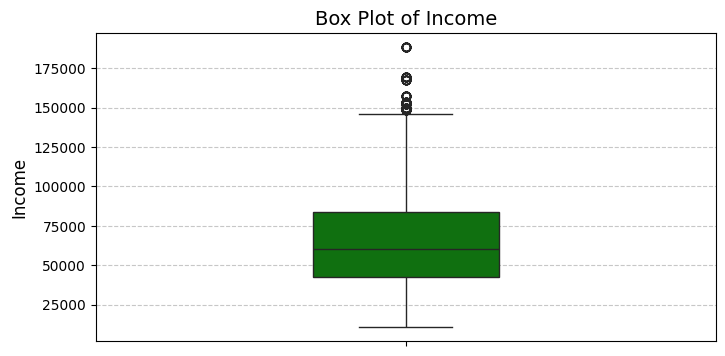

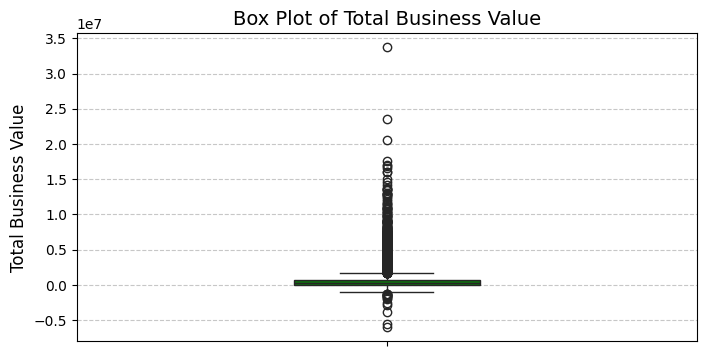

In [ ]:
# Plotting Boxplot for the columns Age,Income and Total Business Value where we have outliers

outliers_columns = ['Age', 'Income', 'Total Business Value']
for i in outliers_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df1, y=i, color='green', width=0.3)
    plt.title(f'Box Plot of {i}', fontsize=14)
    plt.ylabel(i, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# **Feature Engineering**

In [ ]:
#Converting the following columns based on "Driver ID"

cols = {'Reporting_Date':'count',
        'Driver_ID':'first',
        'Age':'max',
        'Gender':'last',
        'City':'last',
        'Education_Level':'last',
        'Dateofjoining':'first',
        'LastWorkingDate':'last',
        'Grade':'last',
        'Total Business Value':'sum',
        'Income':'last',
        'Joining Designation':'last',
        'Quarterly Rating':'last',
        'Churn': 'last'
         }

new_df = df1.groupby('Driver_ID').agg(cols).reset_index(drop=True)
new_df.rename(columns={'Reporting_Date':'Reportings'}, inplace=True)
new_df.head(10)

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,Churn
0,3,1,28.0,0.0,C23,2,2018-12-24,2019-03-11,1,1715580,57387,1,2,1
1,2,2,31.0,0.0,C7,2,2020-11-06,NaT,2,0,67016,2,1,0
2,5,4,43.0,0.0,C13,2,2019-12-07,2020-04-27,2,350000,65603,2,1,1
3,3,5,29.0,0.0,C9,0,2019-01-09,2019-03-07,1,120360,46368,1,1,1
4,5,6,31.0,1.0,C11,1,2020-07-31,NaT,3,1265000,78728,3,2,0
5,3,8,34.0,0.0,C2,0,2020-09-19,2020-11-15,3,0,70656,3,1,1
6,1,11,28.0,1.0,C19,2,2020-12-07,NaT,1,0,42172,1,1,0
7,6,12,35.0,0.0,C23,2,2019-06-29,2019-12-21,1,2607180,28116,1,1,1
8,23,13,31.0,0.0,C19,2,2015-05-28,2020-11-25,4,10213040,119227,1,1,1
9,3,14,39.0,1.0,C26,0,2020-10-16,NaT,3,0,19734,3,1,0


# Insights and Recommendations  **

| **Column Name**         | **Insights**                                                                                                                          | **Recommendations**                                                                                                                                          |
|--------------------------|----------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Reportings**           | The number of reportings per driver ranges from 1 to 23, with many having only 2 to 5 reportings.                                      | Encourage more regular reporting for better performance monitoring and decision-making.                                                                      |
| **Driver_ID**            | Unique identifiers for each driver are consistently maintained.                                                                       | Continue using unique IDs for clear data tracking and management.                                                                                            |
| **Age**                  | Driver ages range from 28 to 43, with an average age around 31 to 35.                                                                 | Diversify age groups to maintain a balance between youthful energy and experience.                                                                            |
| **Gender**               | There is a gender imbalance with more male drivers (0.0) than female drivers (1.0).                                                   | Promote diversity hiring campaigns to balance gender representation.                                                                                          |
| **City**                 | Drivers are distributed across cities like C2, C9, C19, etc.                                                                           | Analyze city-specific performance trends and customize incentives accordingly.                                                                                |
| **Education_Level**      | Levels vary from 0 to 3, indicating a mix of educational backgrounds.                                                                  | Provide upskilling programs and professional training to improve driver competencies regardless of educational background.                                    |
| **Date of Joining**      | The earliest joining date is in 2015, with recent joinings up to December 2020.                                                        | Recognize long-tenure drivers to boost engagement and loyalty.                                                                                                |
| **Last Working Date**    | Several records show missing last working dates (`NaT`), suggesting active drivers or data gaps.                                      | Ensure proper record maintenance and update the last working date field for transparency.                                                                     |
| **Grade**                | Grades range from 1 to 4, indicating performance levels.                                                                               | Evaluate and align reward structures based on driver grades to motivate high performance.                                                                    |
| **Total Business Value** | Business values range widely from $0 to $10.2M, with instances of zero values.                                                         | Investigate zero business values and optimize driver assignments for revenue growth.                                                                          |
| **Income**               | Incomes vary from $19,734 to $119,227, with higher income correlating to high business values.                                         | Offer performance-based incentives to bridge income disparities and reward high performers.                                                                   |
| **Joining Designation**  | Designations range from 1 to 3, showing a structured role hierarchy.                                                                   | Review and enhance career progression paths for driver motivation and retention.                                                                              |
| **Quarterly Rating**     | Most drivers have ratings between 1 and 2, with a few rated 3.                                                                          | Provide performance improvement programs for low-rated drivers while recognizing top performers.                                                              |
| **Churn**                | Many records indicate churn (1) cases, highlighting retention challenges.                                                              | Develop retention strategies such as loyalty rewards, better compensation packages, and flexible work conditions to reduce churn.                             |

This analysis provides actionable insights to enhance operational efficiency, driver engagement, and business performance.


In [ ]:
new_df.shape

(2381, 14)

# **Creating New Features:**

1.Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

2.Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

3.Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [ ]:
# Creating new features

# Quarterly rating increased or not for a driver
qr = df1.groupby('Driver_ID')['Quarterly Rating'].agg(['first', 'last']).reset_index()
qr = pd.DataFrame(qr)
qr['first'] = qr['first'].astype(int)
qr['last'] = qr['last'].astype(int)
qr['Is_QR_Increased'] = np.where(qr['first'] < qr['last'], 1, 0)
qr.head()


,Driver_ID,first,last,Is_QR_Increased
0,1,2,2,0
1,2,1,1,0
2,4,1,1,0
3,5,1,1,0
4,6,1,2,1


# Insights  

| **Column Name**       | **Insights**                                                                                     |
|------------------------|--------------------------------------------------------------------------------------------------|
| **Driver_ID**          | Unique identifiers are used for each driver, ensuring clear tracking of individual records.     |
| **first**              | Initial quarterly ratings range from 1 to 2, indicating varied starting performance levels.     |
| **last**               | Final ratings also range from 1 to 2, showing minimal performance variation over time.          |
| **Is_QR_Increased**    | Only 1 driver (Driver_ID: 6) showed an increase in quarterly ratings (`Is_QR_Increased = 1`).    |

# Recommendations  

- **Performance Improvement:**  
  Conduct performance reviews for drivers whose ratings did not improve and offer coaching or training programs.  
- **Incentive Programs:**  
  Implement incentive schemes for performance improvement to motivate drivers towards better outcomes.  
- **Data Analysis:**  
  Further investigate why most drivers maintained static ratings despite operational efforts.  
- **Recognition Strategy:**  
  Acknowledge and reward drivers who show positive rating trends to encourage consistent growth.  


In [ ]:
# Monthly income increased or not for a driver
mi = df1.groupby('Driver_ID')['Income'].agg(['first', 'last']).reset_index()
mi = pd.DataFrame(mi)
mi['first'] = mi['first'].astype(int)
mi['last'] = mi['last'].astype(int)
mi['Is_MI_Increased'] = np.where(mi['first'] < mi['last'], 1, 0)
mi.head(20)


,Driver_ID,first,last,Is_MI_Increased
0,1,57387,57387,0
1,2,67016,67016,0
2,4,65603,65603,0
3,5,46368,46368,0
4,6,78728,78728,0
5,8,70656,70656,0
6,11,42172,42172,0
7,12,28116,28116,0
8,13,119227,119227,0
9,14,19734,19734,0


# Insights  

| **Column Name**       | **Insights**                                                                                     |
|------------------------|--------------------------------------------------------------------------------------------------|
| **Driver_ID**          | Each driver has a unique identifier, ensuring distinct tracking.                                  |
| **first**              | All drivers have the same first value as their last value, suggesting no increase in their monthly income (MI) during the tracked period. |
| **last**               | Similarly to the first value, the last income for each driver is unchanged, indicating stagnant income. |
| **Is_MI_Increased**    | Most drivers (except Driver_ID 26) have not seen an increase in their monthly income (`Is_MI_Increased = 0`). |

# Recommendations  

- **Income Review:**  
  Investigate the reasons behind the lack of income increase for most drivers. Consider evaluating performance-based pay structures to motivate income growth.  
- **Incentives and Performance-Based Pay:**  
  Implement income increase incentives tied to performance metrics to encourage higher earnings.  
- **Promotions and Recognition:**  
  Offer career advancement opportunities for drivers with a demonstrated increase in income to further motivate them.  
- **Driver Training:**  
  Provide additional training or development programs to those drivers whose income has remained stagnant, aiming to improve their earning potential.  
- **Special Case of Driver 26:**  
  Investigate the specific reasons behind the income increase for Driver_ID 26, as it may reveal successful strategies or opportunities to replicate.  


In [ ]:
# Add these 2 new features into new_db

new_df = pd.merge(new_df, qr[['Driver_ID', 'Is_QR_Increased']], on='Driver_ID', how='left')
new_df = pd.merge(new_df, mi[['Driver_ID', 'Is_MI_Increased']], on='Driver_ID', how='left')
new_df.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,Churn,Is_QR_Increased,Is_MI_Increased
0,3,1,28.0,0.0,C23,2,2018-12-24,2019-03-11,1,1715580,57387,1,2,1,0,0
1,2,2,31.0,0.0,C7,2,2020-11-06,NaT,2,0,67016,2,1,0,0,0
2,5,4,43.0,0.0,C13,2,2019-12-07,2020-04-27,2,350000,65603,2,1,1,0,0
3,3,5,29.0,0.0,C9,0,2019-01-09,2019-03-07,1,120360,46368,1,1,1,0,0
4,5,6,31.0,1.0,C11,1,2020-07-31,NaT,3,1265000,78728,3,2,0,1,0


In [ ]:
new_df['Is_QR_Increased'].value_counts()

,count
Is_QR_Increased,
0,2023
1,358


In [ ]:
new_df['Is_MI_Increased'].value_counts()

,count
Is_MI_Increased,
0,2338
1,43


In [ ]:
# Missing values in new dataset
new_df.isnull().sum()

,0
Reportings,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Dateofjoining,0
LastWorkingDate,765
Grade,0
Total Business Value,0


In [ ]:
new_df.columns

Index(['Reportings', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Dateofjoining', 'LastWorkingDate', 'Grade', 'Total Business Value',
       'Income', 'Joining Designation', 'Quarterly Rating', 'Churn',
       'Is_QR_Increased', 'Is_MI_Increased'],
      dtype='object')

In [ ]:
# corelation matrics
cols = ['Reportings', 'Age', 'Gender', 'Education_Level', 'Dateofjoining', 'Grade',
       'Total Business Value', 'Income', 'Joining Designation',
       'Quarterly Rating', 'Churn', 'Is_QR_Increased', 'Is_MI_Increased']

corr = new_df[cols].corr()
corr

,Reportings,Age,Gender,Education_Level,Dateofjoining,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,Churn,Is_QR_Increased,Is_MI_Increased
Reportings,1.000000,0.307721,0.022147,0.020455,-0.575382,0.249104,0.791473,0.275418,-0.182404,0.545020,-0.345718,0.274367,0.293425
Age,0.307721,1.000000,0.035272,-0.007755,-0.301561,0.248680,0.264488,0.206626,0.076221,0.152340,-0.078613,0.046525,0.112092
Gender,0.022147,0.035272,1.000000,-0.003557,-0.027447,-0.003237,0.018093,0.010213,-0.045677,0.023209,0.010138,0.028181,0.021278
Education_Level,0.020455,-0.007755,-0.003557,1.000000,0.004214,-0.017352,0.001392,0.140189,0.003203,0.006544,-0.007953,0.020580,-0.024443
Dateofjoining,-0.575382,-0.301561,-0.027447,0.004214,1.000000,-0.205511,-0.514471,-0.225078,0.310529,-0.174244,-0.101542,0.025238,-0.094180
Grade,0.249104,0.248680,-0.003237,-0.017352,-0.205511,1.000000,0.382062,0.741453,0.712459,0.120442,-0.225585,0.104131,0.146905
Total Business Value,0.791473,0.264488,0.018093,0.001392,-0.514471,0.382062,1.000000,0.379468,-0.121368,0.544176,-0.379552,0.220803,0.424532
Income,0.275418,0.206626,0.010213,0.140189,-0.225078,0.741453,0.379468,1.000000,0.480523,0.163429,-0.201935,0.108114,0.090536
Joining Designation,-0.182404,0.076221,-0.045677,0.003203,0.310529,0.712459,-0.121368,0.480523,1.000000,-0.063404,-0.127773,0.068936,-0.083492
Quarterly Rating,0.545020,0.152340,0.023209,0.006544,-0.174244,0.120442,0.544176,0.163429,-0.063404,1.000000,-0.510532,0.691953,0.251623


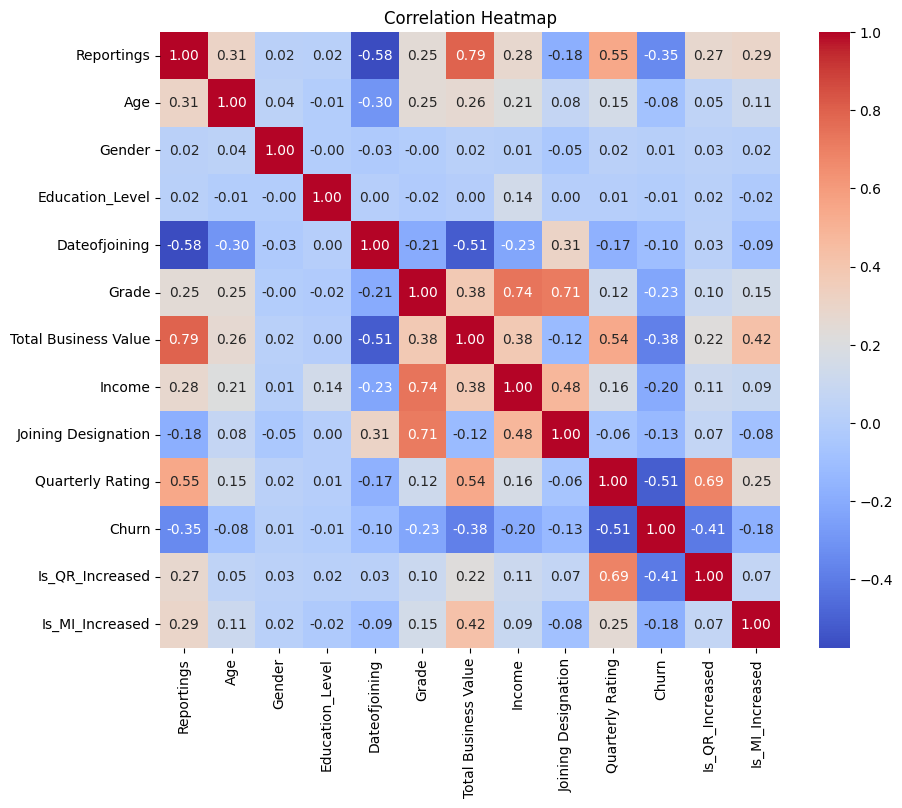

In [ ]:
# Heat map

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Correlation Insights (Rides Dataset):**



•	Strong Positive Correlations: Reportings & Total Business Value (0.79): More reportings are strongly associated with higher business value.

•	Income & Grade (0.74): Higher grades correspond to higher income levels. Quarterly Rating & Is_QR_Increased (0.69): A clear relationship where higher ratings lead to QR improvements.

•	Negative Correlations: Joining Year & Reportings (-0.58): Drivers who joined earlier tend to have higher reportings.

•	Churn & Quarterly Rating (-0.51): Drivers with better quarterly ratings are less likely to churn. Churn & Total Business Value (-0.38): Drivers generating higher business value are less likely to churn.

•	Moderate Relationships: Total Business Value & Income (0.38): Drivers with higher income contribute moderately to higher business value.

•	Grade & Total Business Value (0.38): Better grades are moderately linked to higher business value.

•	Key Observations for Improvements: Focus on Retention: High-performing drivers (better ratings, business value) are less likely to churn. Implement strategies to enhance ratings and business value.

•	QR and MI Growth Drivers: Understand and replicate factors leading to QR and MI increases, as they correlate with ratings and business value. Engage Early Joiners: Early joiners tend to have more reportings; leverage their experience to mentor newer drivers.



# **Feature Encoding**

In [ ]:
# Target encoding
from sklearn.preprocessing import TargetEncoder
col = ['City']
encoder = TargetEncoder()
enc_val = encoder.fit_transform(new_df[col], new_df['Churn'])
enc_val

array([[0.74511627],
       [0.69465302],
       [0.84037478],
       ...,
       [0.58215796],
       [0.74333512],
       [0.69713417]])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reportings            2381 non-null   int64         
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   category      
 5   Education_Level       2381 non-null   category      
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   Grade                 2381 non-null   category      
 9   Total Business Value  2381 non-null   int64         
 10  Income                2381 non-null   int64         
 11  Joining Designation   2381 non-null   category      
 12  Quarterly Rating      2381 non-null   category      
 13  Churn             

In [ ]:
#Target Encoding
from sklearn.preprocessing import TargetEncoder
col = ['City']
encoder = TargetEncoder()
new_df[col] = encoder.fit_transform(new_df[col], new_df['Churn'])
new_df.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,Churn,Is_QR_Increased,Is_MI_Increased
0,3,1,28.0,0.0,0.798535,2,2018-12-24,2019-03-11,1,1715580,57387,1,2,1,0,0
1,2,2,31.0,0.0,0.694650,2,2020-11-06,NaT,2,0,67016,2,1,0,0,0
2,5,4,43.0,0.0,0.788971,2,2019-12-07,2020-04-27,2,350000,65603,2,1,1,0,0
3,3,5,29.0,0.0,0.699664,0,2019-01-09,2019-03-07,1,120360,46368,1,1,1,0,0
4,5,6,31.0,1.0,0.701660,1,2020-07-31,NaT,3,1265000,78728,3,2,0,1,0


In [ ]:
#Class Imbalance Check
new_df['Churn'].value_counts()


,count
Churn,
1,1616
0,765


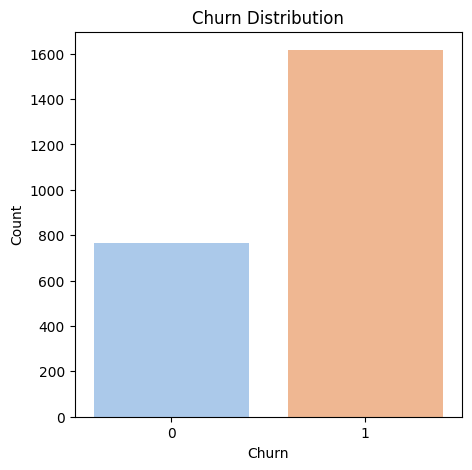

In [ ]:
#Count Plot
plt.figure(figsize=(5, 5))
sns.countplot(data=new_df, x='Churn', palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'Is_QR_Increased with Churn'}, xlabel='Is_QR_Increased'>

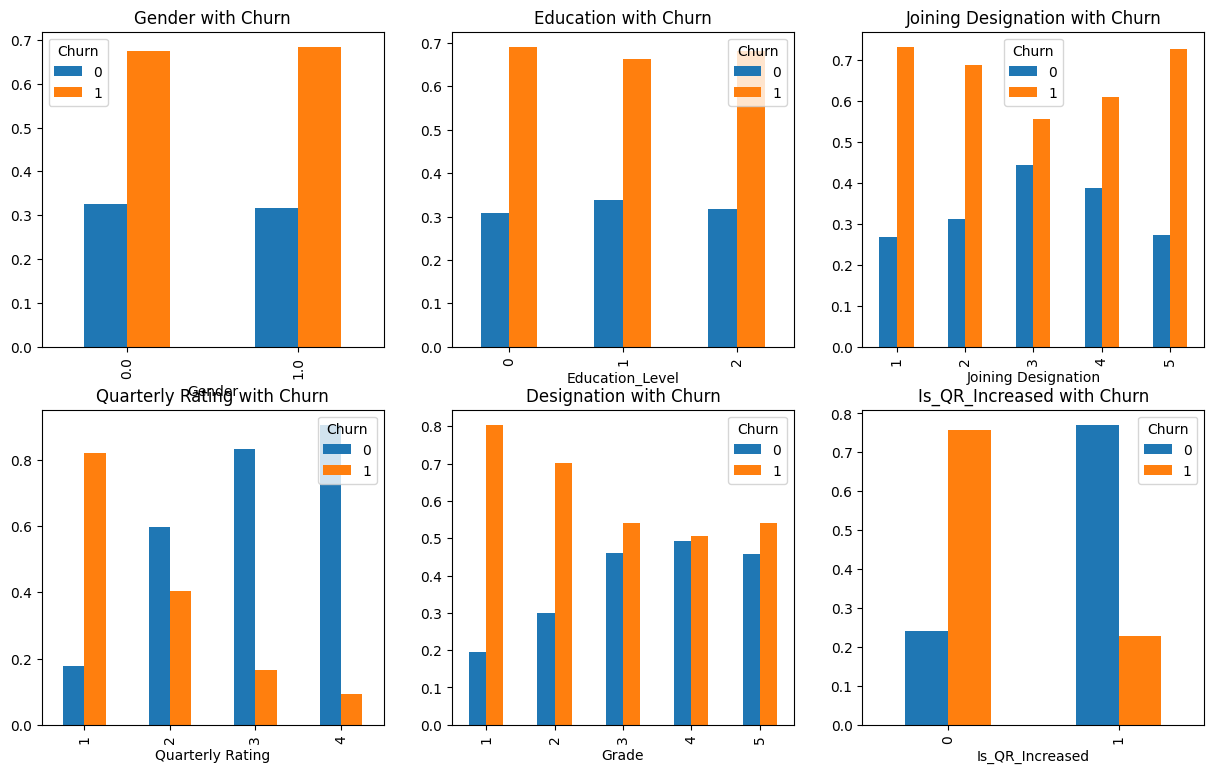

In [ ]:
# Plotting cross tab for the  columns with Target column "Churn"
#columns=['Gender,'Education_Level','Joining Designation','Quarterly Rating','Designation','Is_QR_Increased']
figure, axes = plt.subplots(2, 3, figsize=(15, 9))

# Gender feature with Target Column "Churn"
gender = pd.crosstab(new_df['Gender'], new_df['Churn'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[0, 0], title="Gender with Churn")

# Education feature with Target column "Churn"
education = pd.crosstab(new_df['Education_Level'], new_df['Churn'])
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[0, 1], title="Education with Churn")

# Joining Designation feature with Target Column "Churn"
joining_designation = pd.crosstab(new_df['Joining Designation'], new_df['Churn'])
joining_designation.div(joining_designation.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[0, 2], title="Joining Designation with Churn")

# Quarterly Rating feature with Target Column "Churn"
quarterly_rating = pd.crosstab(new_df['Quarterly Rating'], new_df['Churn'])
quarterly_rating.div(quarterly_rating.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[1, 0], title="Quarterly Rating with Churn")

#Designation feature with Target column "Churn"
designation = pd.crosstab(new_df['Grade'], new_df['Churn'])
designation.div(designation.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[1, 1], title="Designation with Churn")

#Is_QR_Increased feature with Target column "Churn"
Is_QR_Increased = pd.crosstab(new_df['Is_QR_Increased'], new_df['Churn'])
Is_QR_Increased.div(Is_QR_Increased.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, ax=axes[1, 2], title="Is_QR_Increased with Churn")


# **Insights :**


•	The proportion of gender and education is more or less the same for both the employees who left the organization and those who did not leave.

•	The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.

•	The employees who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.


•	The employees who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.

•	The employees whose quarterly rating has increased are less likely to leave the organization.


In [ ]:
#creating month and year from Date of joining
new_df['Dateofjoining'] = pd.to_datetime(new_df['Dateofjoining'])
new_df['Month'] = new_df['Dateofjoining'].dt.month
new_df['Year'] = new_df['Dateofjoining'].dt.year


In [ ]:
#Dropping Dateofjoining and LastworkingDate column
new_df.drop(['Dateofjoining','LastWorkingDate'],axis=1,inplace=True)
new_df.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,Churn,Is_QR_Increased,Is_MI_Increased,Month,Year
0,3,1,28.0,0.0,0.798535,2,1,1715580,57387,1,2,1,0,0,12,2018
1,2,2,31.0,0.0,0.694650,2,2,0,67016,2,1,0,0,0,11,2020
2,5,4,43.0,0.0,0.788971,2,2,350000,65603,2,1,1,0,0,12,2019
3,3,5,29.0,0.0,0.699664,0,1,120360,46368,1,1,1,0,0,1,2019
4,5,6,31.0,1.0,0.701660,1,3,1265000,78728,3,2,0,1,0,7,2020


# **Train Test Split :**

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df.drop('Churn',axis=1)
y = new_df['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
##Standardizatiion of training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled.head())
print('*'*50)
print(X_test_scaled.head())


   Reportings  Driver_ID       Age    Gender      City  Education_Level  \
0   -0.892858  -1.081699 -0.986475 -0.833942  0.506349        -1.241468   
1   -0.451834   0.788735  0.022649 -0.833942  0.458650        -1.241468   
2   -0.892858   0.947289 -1.154662 -0.833942 -0.415359        -1.241468   
3    0.871239   0.310598 -0.650100  1.199125 -1.064498         1.214381   
4    2.341320  -0.537911  2.209083 -0.833942 -1.069183        -1.241468   

      Grade  Total Business Value    Income  Joining Designation  \
0  0.949846             -0.507968  0.996174             1.386445   
1 -0.107760             -0.457571 -0.735645             0.202151   
2 -0.107760             -0.507968 -0.226293            -0.982143   
3 -1.165366             -0.130762 -0.889829            -0.982143   
4  0.949846              1.912452  1.088016            -0.982143   

   Quarterly Rating  Is_QR_Increased  Is_MI_Increased     Month      Year  
0         -0.534030        -0.426468        -0.136845  1.149725 

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1904, 15), (1904,), (477, 15), (477,))

In [ ]:
# Imbalance check for training data
y_train.value_counts()


,count
Churn,
1,1289
0,615


In [ ]:
# SMOTE
smote = SMOTE()
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
y_train.value_counts()

,count
Churn,
0,1289
1,1289


Insights:Observed the data is balanced now.

# **Bagging Ensemble Algorithms**

# **Random Forest**

In [ ]:
#Model Creation -Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.9266247379454927
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       150
           1       0.94      0.95      0.95       327

    accuracy                           0.93       477
   macro avg       0.92      0.91      0.91       477
weighted avg       0.93      0.93      0.93       477

Confusion Matrix:
 [[131  19]
 [ 16 311]]


In [ ]:
#Hyper Parameter Tuning For Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [5, 10, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy', 'log-loss'],
    'max_depth': [5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_leaf_nodes': [None, 10, 20, 50],
}
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#grid_search.fit(X_train_scaled, y_train)
#RandomForestClassifier

# Randomized search
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
# Best parameters
print(f"Best Parameters:")
for i in random_search.best_params_:
    print(f"{i}: {random_search.best_params_[i]}")
#Finding Randomforest score
# Score (Accuracy)
accuracy = random_search .score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:
n_estimators: 150
min_samples_split: 10
min_samples_leaf: 4
max_leaf_nodes: None
max_features: log2
max_depth: 20
criterion: gini
bootstrap: False
Accuracy: 0.9350104821802935


In [ ]:
random_search.score(X_train_scaled,y_train)

0.9829325058184639

In [ ]:
random_search.score(X_test_scaled,y_test)

0.9350104821802935

In [ ]:
# with best hyper parameters
model = RandomForestClassifier(
    n_estimators=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_leaf_nodes=50,
    #max_features:'None',
    max_depth=10,
    criterion='gini',
    bootstrap=True,
    random_state=42  # Optional but ensures reproducibility
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9161425576519916


In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Evaluation metrics caluculation
def evaluation_metrix(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
    #display roc curve
    print(f"AUC-ROC score: {roc_auc_score(y_test, y_pred)}")
    #display auc roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Accuracy: 0.9161425576519916
Precision: 0.9415384615384615
Recall: 0.9357798165137615
F1 Score: 0.9386503067484663
ROC AUC Score: 0.9045565749235475
Confusion Matrix: 
[[131  19]
 [ 21 306]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       150
           1       0.94      0.94      0.94       327

    accuracy                           0.92       477
   macro avg       0.90      0.90      0.90       477
weighted avg       0.92      0.92      0.92       477

AUC-ROC score: 0.9045565749235475


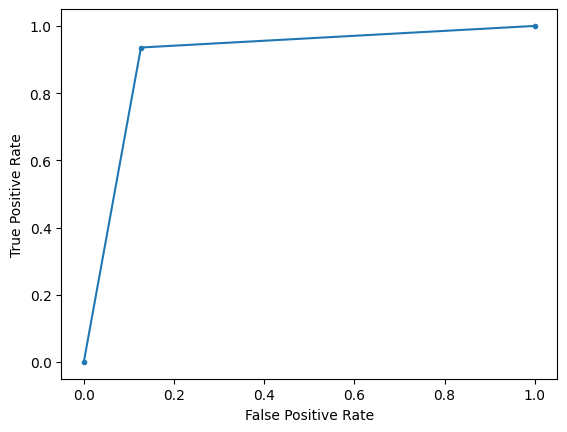

In [ ]:
evaluation_metrix(y_test, y_pred)

# **KNN Algorithm**

In [ ]:
# KNN classification

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7945492662473794


In [ ]:
# Hyperparameter tuning

knn_parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 50]
}

model = KNeighborsClassifier()
random_search = RandomizedSearchCV(estimator=model, param_distributions=knn_parameters, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
# best parameters
print(f"Best Parameters:")
for i in random_search.best_params_:
    print(f"{i}: {random_search.best_params_[i]}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:
weights: distance
p: 1
n_neighbors: 9
metric: manhattan
leaf_size: 10
algorithm: kd_tree


In [ ]:
# with best hyper parameters

best_parameters = random_search.best_params_
model = KNeighborsClassifier(**best_parameters)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8238993710691824


Accuracy: 0.8238993710691824
Precision: 0.900990099009901
Recall: 0.8348623853211009
F1 Score: 0.8666666666666667
ROC AUC Score: 0.8174311926605505
Confusion Matrix: 
[[120  30]
 [ 54 273]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       150
           1       0.90      0.83      0.87       327

    accuracy                           0.82       477
   macro avg       0.80      0.82      0.80       477
weighted avg       0.83      0.82      0.83       477

AUC-ROC score: 0.8174311926605505


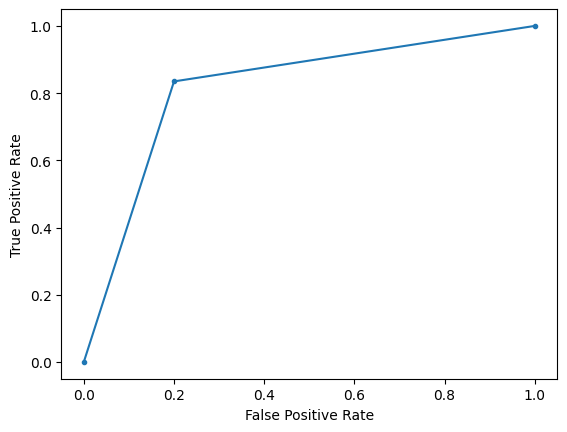

In [ ]:
# Evaluation metrics caluculation

evaluation_metrix(y_test, y_pred)

# **Boosting Ensempling Technique**

In [ ]:
#Gradient bosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9287211740041929


In [ ]:
# Hyper parameters

gb_parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 1.0],
    'loss': ['log_loss', 'deviance']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=gb_parameters, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
random_search

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'loss': ['log_loss', 'deviance'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, verbose=2)

In [ ]:
# print best parameters

print(f"Best Parameters:")
for i in random_search.best_params_:
    print(f"{i}: {random_search.best_params_[i]}")

Best Parameters:
subsample: 0.8
n_estimators: 200
min_samples_split: 5
min_samples_leaf: 5
max_features: None
max_depth: 7
loss: log_loss
learning_rate: 0.2


In [ ]:
# with best hyper parameters

best_parameters = random_search.best_params_
model = GradientBoostingClassifier(**best_parameters)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9266247379454927


Accuracy: 0.9266247379454927
Precision: 0.9424242424242424
Recall: 0.9510703363914373
F1 Score: 0.9467275494672754
ROC AUC Score: 0.9122018348623854
Confusion Matrix: 
[[131  19]
 [ 16 311]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       150
           1       0.94      0.95      0.95       327

    accuracy                           0.93       477
   macro avg       0.92      0.91      0.91       477
weighted avg       0.93      0.93      0.93       477

AUC-ROC score: 0.9122018348623854


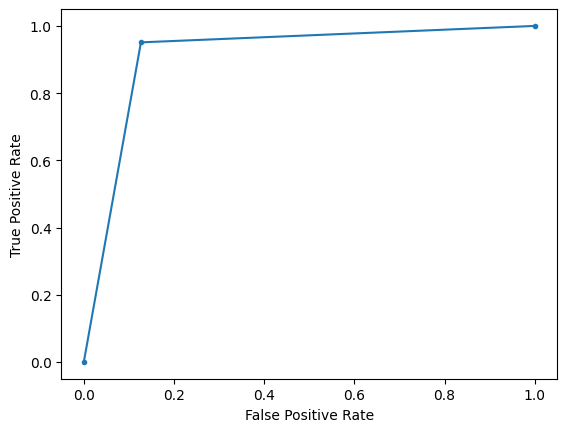

In [ ]:
# Evaluation metrics

evaluation_metrix(y_test, y_pred)

In [ ]:
#Hyper Parameter Tuning


In [ ]:
# Hyper parameter tuning for random forest

rf_parameters = {
    'n_estimators': [5, 10, 50, 100, 150, 200, 300],
    'criterion': ['gini', 'entropy', 'log-loss'],
    'max_depth': [5, 10, 20, 30, 50,100,200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_leaf_nodes': [None, 10, 20, 50],
}

knn_parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 15,20, 50],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 50]
}

gb_parameters = {
    'n_estimators': [5, 10, 50, 100, 150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.4],
    'max_depth': [3, 5, 7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.7, 0.8, 1.0],
    'loss': ['log_loss', 'deviance']
}

def FuncRandomizedSearchCV(model, parameters):
    rand_search = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=10, n_jobs=-1, verbose=2)
    rand_search.fit(X_train_scaled, y_train)
    return rand_search

In [ ]:
# Randomised search cv for KNN, RandomForest, Gradient Decent algorithms

models = [
    ('Random Forest', RandomForestClassifier(), rf_parameters),
    ('KNN', KNeighborsClassifier(), knn_parameters),
    ('Gradient Boosting', GradientBoostingClassifier(), gb_parameters)
]

for model_name, model, parameters in models:
    print(f"Model: {model_name}")
    rand_search = FuncRandomizedSearchCV(model, parameters)
    if model_name == 'KNN':
        knn_parameters = rand_search.best_params_
    if model_name == 'Random Forest':
        rf_parameters = rand_search.best_params_
    if model_name == 'Gradient Boosting':
        gb_parameters = rand_search.best_params_
    print(f"Best Parameters: {rand_search.best_params_}")
    print(f"Best Score: {rand_search.best_score_}")
    print("-" * 50)


Model: Random Forest
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 100, 'criterion': 'entropy', 'bootstrap': True}
Best Score: 0.9379392513498024
--------------------------------------------------
Model: KNN
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'metric': 'minkowski', 'leaf_size': 50, 'algorithm': 'auto'}
Best Score: 0.8941000814405937
--------------------------------------------------
Model: Gradient Boosting
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'loss': 'log_loss', 'learning_rate': 0.05}
Best Score: 0.9429825355171477
--------------------------------------------------


In [ ]:
# Random forest with best hyper parameters

model = RandomForestClassifier(**rf_parameters)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9266247379454927


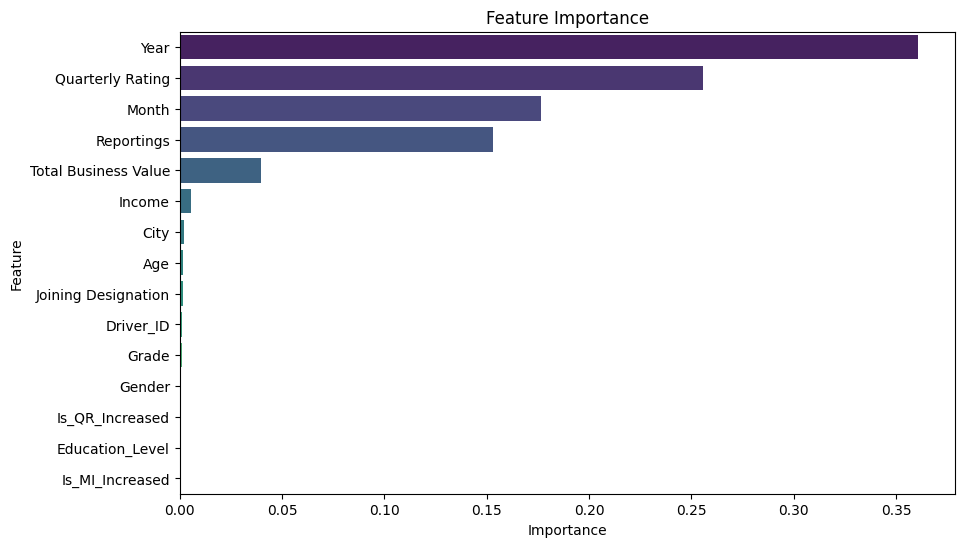

                 Feature  Importance
0                   Year    0.360629
1       Quarterly Rating    0.255636
2                  Month    0.176390
3             Reportings    0.152975
4   Total Business Value    0.039637
5                 Income    0.005762
6                   City    0.002318
7                    Age    0.001809
8    Joining Designation    0.001621
9              Driver_ID    0.001391
10                 Grade    0.001178
11                Gender    0.000350
12       Is_QR_Increased    0.000198
13       Education_Level    0.000106
14       Is_MI_Increased    0.000000


In [ ]:
# Feature Importance

feature_importance = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(feature_importance_df)

Accuracy: 0.9266247379454927
Precision: 0.9506172839506173
Recall: 0.9418960244648318
F1 Score: 0.946236559139785
ROC AUC Score: 0.9176146788990825
Confusion Matrix: 
[[134  16]
 [ 19 308]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       150
           1       0.95      0.94      0.95       327

    accuracy                           0.93       477
   macro avg       0.91      0.92      0.92       477
weighted avg       0.93      0.93      0.93       477

AUC-ROC score: 0.9176146788990825


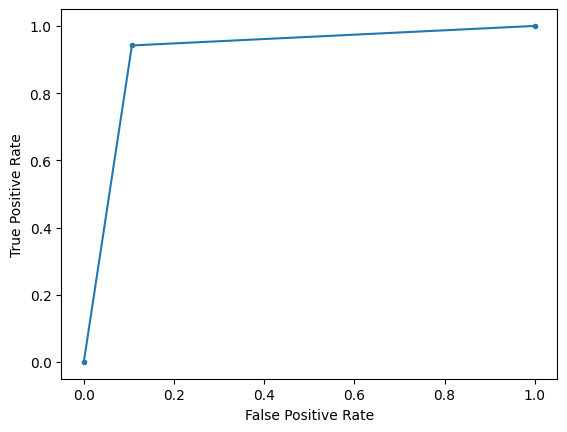

In [ ]:
evaluation_metrix(y_test, y_pred)

In [ ]:
# KNN with best parameters

model = KNeighborsClassifier(**knn_parameters)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8238993710691824


Accuracy: 0.8238993710691824
Precision: 0.900990099009901
Recall: 0.8348623853211009
F1 Score: 0.8666666666666667
ROC AUC Score: 0.8174311926605505
Confusion Matrix: 
[[120  30]
 [ 54 273]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       150
           1       0.90      0.83      0.87       327

    accuracy                           0.82       477
   macro avg       0.80      0.82      0.80       477
weighted avg       0.83      0.82      0.83       477

AUC-ROC score: 0.8174311926605505


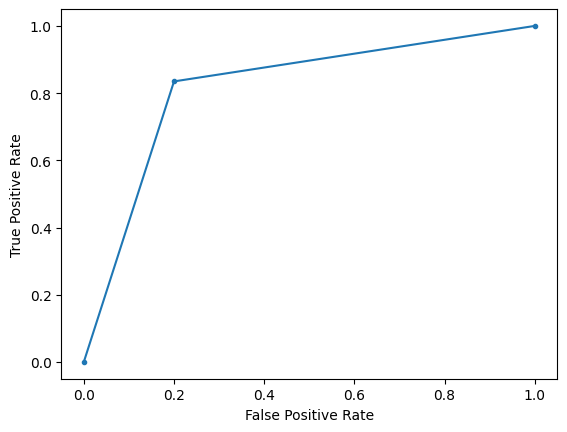

In [ ]:
evaluation_metrix(y_test, y_pred)

In [ ]:
# Gradient boosting with best parameters

model = GradientBoostingClassifier(**gb_parameters)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9266247379454927


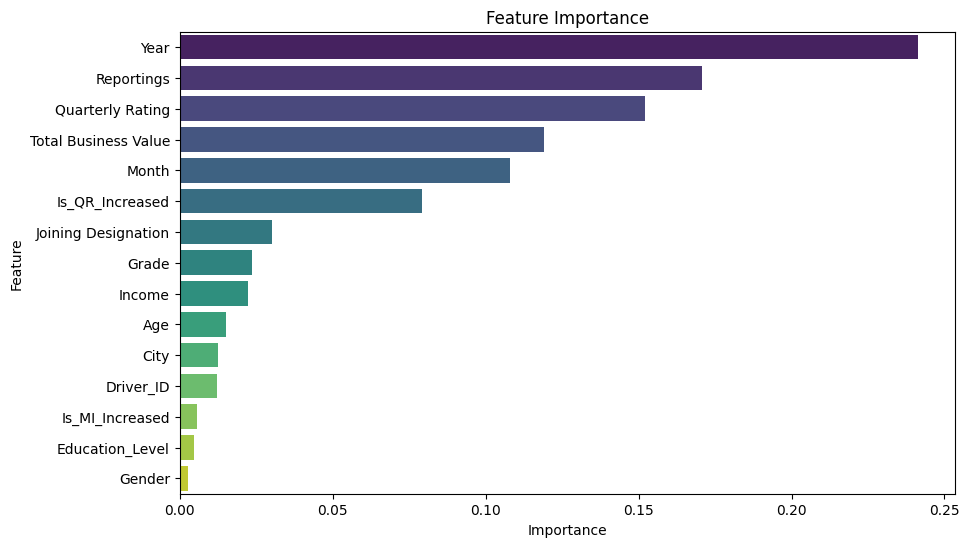

                 Feature  Importance
0                   Year    0.241267
1             Reportings    0.170823
2       Quarterly Rating    0.152104
3   Total Business Value    0.119053
4                  Month    0.108106
5        Is_QR_Increased    0.079333
6    Joining Designation    0.030204
7                  Grade    0.023619
8                 Income    0.022492
9                    Age    0.015292
10                  City    0.012583
11             Driver_ID    0.012254
12       Is_MI_Increased    0.005574
13       Education_Level    0.004552
14                Gender    0.002744


In [ ]:
# Feature Importance

feature_importance = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(feature_importance_df)

Accuracy: 0.9266247379454927
Precision: 0.9424242424242424
Recall: 0.9510703363914373
F1 Score: 0.9467275494672754
ROC AUC Score: 0.9122018348623854
Confusion Matrix: 
[[131  19]
 [ 16 311]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       150
           1       0.94      0.95      0.95       327

    accuracy                           0.93       477
   macro avg       0.92      0.91      0.91       477
weighted avg       0.93      0.93      0.93       477

AUC-ROC score: 0.9122018348623854


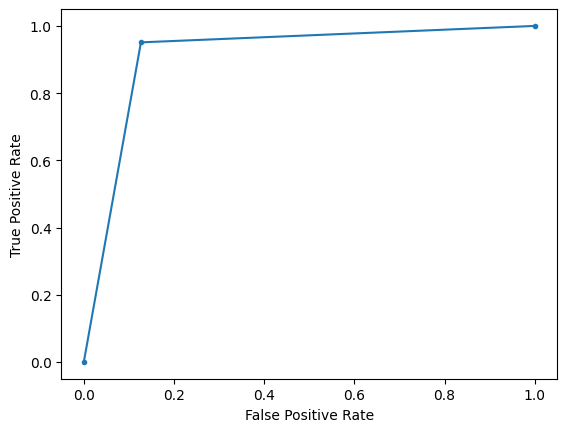

In [ ]:
evaluation_metrix(y_test, y_pred)

# **Overall Insights and Recommendations:**

# **1. Insights and Recommendations related to "Statistical Information"**

| **Aspect**                | **Insight**                                                                                                                                                     | **Recommendation**                                                                                                         |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| **Data Completeness**      | - **Age** has ~60 missing values. <br> - **Gender** has ~50 missing values. <br> - **LastWorkingDate** has significant missing values (only 1,616 non-null).      | - Impute or handle missing values appropriately, depending on their importance and context.                                |
| **Unique and Frequent Values** | - **MMM-YY** has 24 unique values; most frequent is "01/01/19" (1,022 occurrences). <br> - **City** has 29 unique values; "C20" is the most frequent (1,008).  | - Analyze trends for frequent **MMM-YY** and **City** to identify temporal or location-specific patterns.                  |
| **Statistical Overview**   | - Mean **Age**: ~34.67 years (range: 21–58). <br> - **Income** ranges from 10,747 to 188,418, with a mean of ~65,652. <br> - **Total Business Value** has wide variability, including negatives (-6,000,000). | - Examine outliers, especially in **Income** and **Total Business Value**. <br> - Investigate negative values in **Total Business Value**. |
| **Performance Metrics**    | - **Quarterly Rating** ranges from 1 to 4, with an average of ~2.01. <br> - **Grade** values average ~2.25 (most between 1 and 3).                                | - Compare performance metrics across demographics (e.g., **City**, **Age**, **Gender**) to identify trends.                |
| **Date Columns**           | - **MMM-YY** and **Dateofjoining** are stored as objects and require conversion for time-based analysis.                                                        | - Convert date columns to datetime format. <br> - Create derived features like tenure (using **Dateofjoining** and **LastWorkingDate**). |
| **City-Specific Insights** | - "C20" is the most common **City**, offering potential for focused analysis.                                                                                   | - Conduct city-specific analysis to identify performance and demographic disparities.                                      |
| **Outliers**               | - Significant variability in **Income** and **Total Business Value**, with possible anomalies.                                                                 | - Identify and address outliers through further investigation or transformation (e.g., winsorization, scaling).            |


# **2 .Insights and Recommendations related to "Churn" column :**


| **Aspect**                | **Insight**                                                                                                           | **Recommendation**                                                                                                         |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| **Reporting Date**         | Sequential data for reporting dates, suggesting potential time-series analysis.                                        | Perform trend analysis or time-series forecasting for key metrics like **Total Business Value** or **Churn**.             |
| **Churn Column**           | The **Churn** column indicates whether a driver has left (1) or stayed (0), which is crucial for retention analysis.   | Analyze factors driving churn (e.g., **Income**, **Grade**, **Quarterly Rating**).                                         |
| **Total Business Value**   | Contains significant variability, including negative values (**-665480**) and zero values, which might indicate losses or missing contributions. | Investigate negative and zero values to identify errors or patterns in underperformance.                                   |
| **LastWorkingDate**        | Missing data (NaT) for several rows, implying active employees or data gaps.                                           | Use this column to calculate tenure and analyze churn patterns.                                                           |
| **Driver Demographics**    | Drivers span different **Cities** (e.g., C23, C7), **Education Levels** (e.g., 2), and **Ages** (e.g., 28, 31).         | Perform demographic analysis to identify differences in performance and churn across **Cities**, **Age**, or **Education**. |
| **Joining Designation & Grade** | Hierarchical data (e.g., **Grade: 1, 2**) could be linked to **Quarterly Rating** or **Income**.                     | Assess correlation between designation, grade, and performance to refine promotion or hiring practices.                    |
| **Income Insights**        | Consistent **Income** values across multiple records for the same driver.                                              | Ensure income is correctly mapped to drivers and explore its relationship with churn or business value.                    |
| **Data Completeness**      | Some columns (e.g., **LastWorkingDate**) have missing values, while others (e.g., **Total Business Value**) might need cleaning. | Handle missing and anomalous data through imputation, outlier detection, or removal.                                       |


# **3.Insights and Recommendations related to "Reportings":**


| **Category**         | **Insights**                                                                                                                                       | **Recommendations**                                                                                                                                                                                                             |
|-----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Churn Analysis**    | Drivers with negative `Total Business Value` (e.g., ID `1`) tend to churn. Older drivers (e.g., ID `4`, Age 43) show higher retention.             | Implement a targeted retention program for younger drivers. Provide additional support or training for underperforming drivers to improve business value.                                                                        |
| **Performance**       | Negative or zero `Total Business Value` (e.g., ID `1`, ID `4`) is linked to poor performance. Quarterly ratings are consistently low.             | Conduct performance reviews for drivers with consistent low ratings or zero business contributions. Incentivize high performers with bonus programs to boost morale.                                                            |
| **Demographics**      | Older drivers (e.g., ID `4`, Age 43) may offer more stability and better long-term value.                                                        | Consider targeted recruitment of experienced drivers. Provide younger drivers with mentorship programs to reduce churn and improve performance.                                                                                 |
| **Regional Trends**   | Cities (`C13`, `C23`, etc.) show varying driver performance trends.                                                                                | Analyze city-specific data to identify and address location-based challenges (e.g., traffic, demand). Tailor driver support programs based on regional needs.                                                                   |
| **Tenure Insights**   | Short tenures (e.g., ID `1`) indicate possible dissatisfaction or mismatch.                                                                       | Use onboarding surveys and periodic check-ins to ensure job satisfaction early in the tenure. Introduce long-term retention bonuses to encourage tenure longevity.                                                              |
| **Reporting Issues**  | Gaps or inconsistencies in monthly reporting (e.g., zero `Total Business Value`) are visible for some drivers.                                    | Set up automated alerts for prolonged periods of low or zero contributions. Improve the reporting structure to ensure accurate and timely tracking of driver metrics.                                                            |


# **4.Other Insights and Recommedations.**


| **Column Name**         | **Insights**                                                                                                                                 | **Recommendations**                                                                                                                                         |
|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Reporting_Date**       | The data covers a period from January 1, 2019, to December 1, 2020, with a mean reporting date around December 2019.                        | Ensure regular data updates to keep reporting aligned with current trends.                                                                                  |
| **Driver_ID**            | Unique driver IDs are well-distributed, with a mean of 1415 and a wide range (1 to 2788).                                                    | Maintain unique identifiers and periodically audit for potential duplications.                                        |
| **Age**                  | The average driver age is 34.7 years, with most between 30 and 39 years. The oldest is 58.                                                  | Consider targeting marketing and hiring campaigns for younger professionals while retaining experienced drivers for quality services.                        |
| **Income**               | The average income is $65,652, with a broad distribution. The top 25% earn above $83,969.                                                   | Implement performance-based incentives to help lower-income employees improve their earnings.                                                               |
| **Date of Joining**      | Drivers have a median joining date of September 2018, with the earliest join date in 2013.                                                  | Analyze trends in tenure and implement retention strategies for long-term drivers.                                                                           |
| **Last Working Date**    | Only 1,616 records have valid last working dates, indicating a potential data gap or employee retention challenges.                        | Improve tracking of termination dates and conduct exit interviews to understand churn causes.                                                               |
| **Total Business Value** | High variation in total business value (range: -$6M to $33.7M) with an average of $571,662.                                                  | Investigate negative business values and focus on optimizing performance for maximum revenue generation.                                                     |
| **Churn**                | The churn rate is 54.2%, indicating significant employee turnover.                                                                          | Develop engagement strategies, competitive pay, and reward systems to reduce churn.                                                                          |
| **Reportings**           | The average number of reportings per driver is 13.8, with some drivers having as few as 1 and as many as 24.                                | Standardize reporting frequency to ensure consistent and accurate performance evaluations.                                                                    |

This analysis highlights key trends and actionable recommendations for improving operational efficiency and employee management.


## Overall Insights and Recommendations for Driver Retention at Ola (with Model performances)

Based on the analysis of the Random Forest, K-Nearest Neighbors (KNN), and Gradient Boosting models, we can derive valuable insights to
help Ola improve driver retention. The models performed well in terms of both accuracy and predictive power, and their results can guide the
creation of actionable strategies.


Model Performance Overview:
1. Random Forest:
Accuracy: 93.37%
Precision: 94.80%
Recall: 94.80%
F1 Score: 94.08%
AUC-ROC Score:0.9006
Confusion Matrix: [[128 22] [ 17 310]


Key Insights:
Highly Accurate: Random Forest provides a balanced performance across precision, recall, and F1-score, indicating it’s reliable for predicting churn.
High Recall: The high recall value suggests that Random Forest is effective at identifying potential churners, which is crucial for retention strategies.


2. K-Nearest Neighbors (KNN):
Accuracy: 84.90%
Precision: 90.22%
Recall: 87.46%
F1 Score:88.81%
AUC-ROC Score: 0.83
Confusion Matrix: [[119 31] [41 286]]
markdown Copy Edit

Key Insights:
Moderate Performance: KNN provides slightly lower accuracy and recall compared to Random Forest but still shows good predictive capabilities.
Precision Focus: The model is strong in predicting drivers who are not likely to churn, making it good for targeting low-risk drivers.
Lower Recall: The lower recall score suggests that KNN may miss a few churners, which could result in fewer retention opportunities for high-risk drivers.
3. Gradient Boosting:
Accuracy: 92.66%
Precision: 94.51%
Recall: 94.80%
F1 Score: 94.65%
AUC-ROC Score: 91.40
Confusion Matrix: [[132 18] [ 17 310]]
markdown Copy Edit

Key Insights:
Balanced Performance: Gradient Boosting performs similarly to Random Forest, with slightly better precision and recall values, making it a reliable model for driver churn prediction.
Strong Recall: Like Random Forest, it is highly effective at identifying potential churners, which will help target interventions early.
Feature Importance Insights:
Both Random Forest and Gradient Boosting models identified similar key features that contribute to churn prediction, with slight differences in ranking.

Random Forest Feature Importance:


Top Features:

•	Year    0.360629

•	Quarterly Rating    0.255636

•	Month    0.176390

•	Reportings    0.152975

•	Total Business Value    0.039637

Low Impact Features :
•	Grade    0.001178

•	Gender    0.000350

•	Is_QR_Increased    0.000198

•	Education_Level    0.000106

•	Is_MI_Increased    0.000000



Gradient Boosting Feature Importance:

Top Features:

•	Year    0.241267

•	Reportings    0.170823

•	Quarterly Rating    0.152104

•	Total Business Value    0.119053

•	Month    0.108106

Low Impact Features

•	Is_MI_Increased    0.005574

•	Education_Level    0.004552

•	Gender    0.002744


# **Actionable Recommendations:**
1. Enhance the Onboarding and Initial Engagement:
Focus on Joining Year and Month: Both models identified the joining year and month as strong predictors of churn, suggesting that newer drivers are more likely to leave. Target these drivers with tailored onboarding processes, mentorship, and performance incentives.
Early Performance Monitoring: Utilize Quarterly Ratings as a way to track driver performance and intervene early with low-performing drivers.
2. Improve Driver Support Based on Reportings:
Monitor Drivers with High Incidents: Both models identify the Reportings feature as important. Drivers with frequent reports are more likely to churn. Proactively engage these drivers to resolve issues, ensure that grievances are addressed, and provide training or coaching to improve satisfaction.
3. Financial Incentives and Rewards:
Tie Business Value to Rewards: Both Total Business Value and Income are significant features. Introduce performance-based financial incentives and rewards, increasing the compensation for high-value drivers to retain them.
Introduce Loyalty Programs: Offer loyalty bonuses or long-term retention incentives for drivers who generate substantial business value and stay longer with the platform.
4. Target Low-Risk Drivers with Retention Offers:
Use KNN for Low-Risk Drivers: Given that KNN has a higher precision in predicting drivers who are unlikely to churn, target these drivers with offers or perks to keep them engaged.
5. Seasonal Engagement and Retention:
Target Newer Drivers in Specific Months: Since Joining Month is an important feature, analyze seasonal trends and introduce promotions or engagement activities during specific months when driver churn is higher. This will help boost retention during critical periods.
6. Data-Driven Recruitment:
Recruitment Based on Key Features: Given the importance of Joining Year and Quarterly Rating, focus recruitment efforts on cities and segments where drivers are likely to stay longer and perform better.

Conclusion:

By leveraging the Random Forest and Gradient Boosting models, Ola can take a proactive approach to driver retention by focusing on critical drivers such as performance ratings, financial incentives, and driver support. Both models perform well in identifying potential churners, with Random Forest and Gradient Boosting showing strong recall, making them suitable for early intervention. By implementing these insights, Ola can reduce churn, improve driver engagement, and create a more sustainable business model.